# Introduction

In this Colab, we will explore the Obesity Dataset from the UCI Machine Learning Repository: Estimation of Obesity Levels Based on Eating Habits and Physical Condition. https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

This dataset contains information about obesity levels,  physical characteristics (such as weight and height), eating and lifestyle habits, along with the corresponding obesity level of each Individual.

Our aim is to perform an initial exploratory data analysis (EDA) to understand the structure and distribution of the dataset. We will then proceed to analyze how different behavioral and physical habits influence Weight and, after that BMI, by running different regression models and see which factors contribute the most of varying levels of obesity.

Finally based on our best regression model, we will run a classification model to predict the obessity level and fine tune it accordingly, based on the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# 1.Initial Data Analysis

## 1.1 Statistical analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
print("\nDistribution of Categorical Variables:")
for column in data.select_dtypes(include=['object']).columns:
    print(f"\n{column}:")
    print(data[column].value_counts())


Distribution of Categorical Variables:

Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC:
SCC
no     2015
yes      96
Name: count, dtype: int64

CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_We

In [6]:
print("Numerical \n")
print(data.describe())

Numerical 

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.6

In [7]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [8]:
data.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [9]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


From the initial analysis we can see that we do not have the BMI rate which is the weight/height**2

In [10]:
print("\nNumber of Unique Values in Each Column:")
print(data.nunique())


Number of Unique Values in Each Column:
Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [11]:
data_new = data.copy()

We create a new feature called BMI which is produced by the Type Weight / Height^2 which gives a clearer picture of the obessity class

In [12]:
data_new["BMI"] = data_new["Weight"] / (data_new["Height"]**2)

## 1.2 BMI Visualization

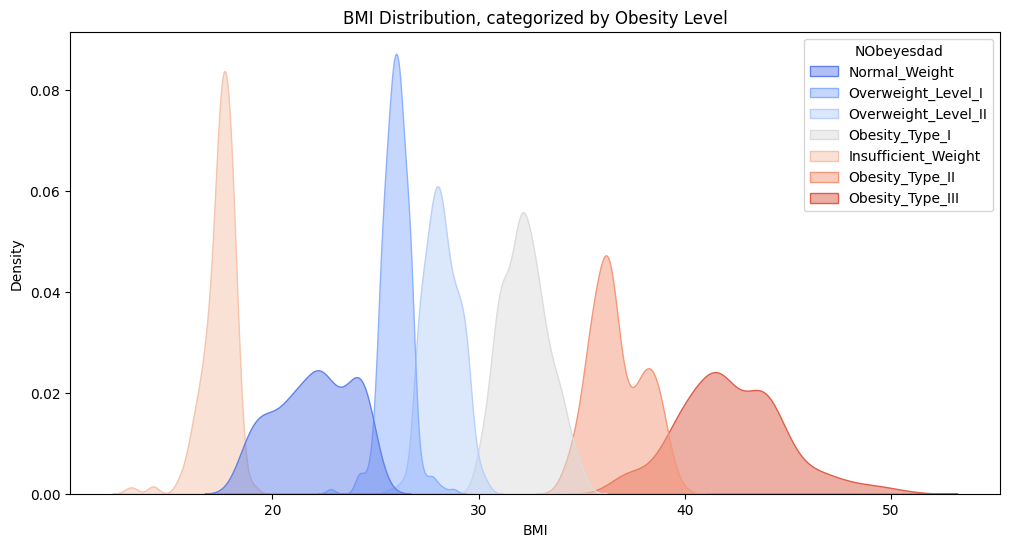

In [13]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_new, x="BMI", hue="NObeyesdad", fill=True, palette="coolwarm", alpha=0.5)
plt.title("BMI Distribution, categorized by Obesity Level")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

From the above distrivutions we can see that regading obesity in relation to BMI the are several overlaps, which can cause some False Positive results, and the sample to be classifed into the next higher or lower category. Also from the distribtuions we can see that there may be several outliers on Obessity Type III and less on Overweight level I.

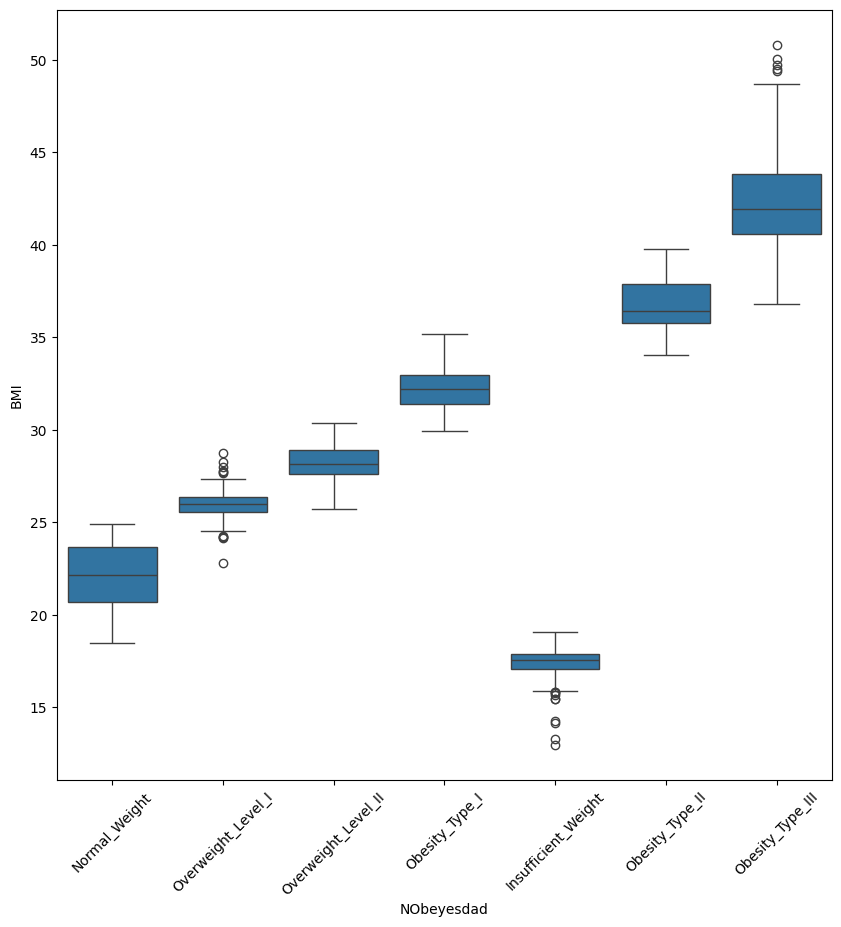

In [14]:
plt.figure(figsize=(10, 10))
ob = sns.boxplot(x = "NObeyesdad", y = "BMI", data=data_new)
ob.tick_params(axis='x', rotation=45)
plt.show()

We can see that up to 25 BMI, it is considered the person to have a normal weight, so let explore the habits of the person of each class and the family history. There are some outliers of course that we can cause some bad resulta in the prediction, which are caused by the persons height. Example if a person is 1.50 Metes tall and weighs 60 Kg, it is considered overweight. We need to see which facotrs contribute to this

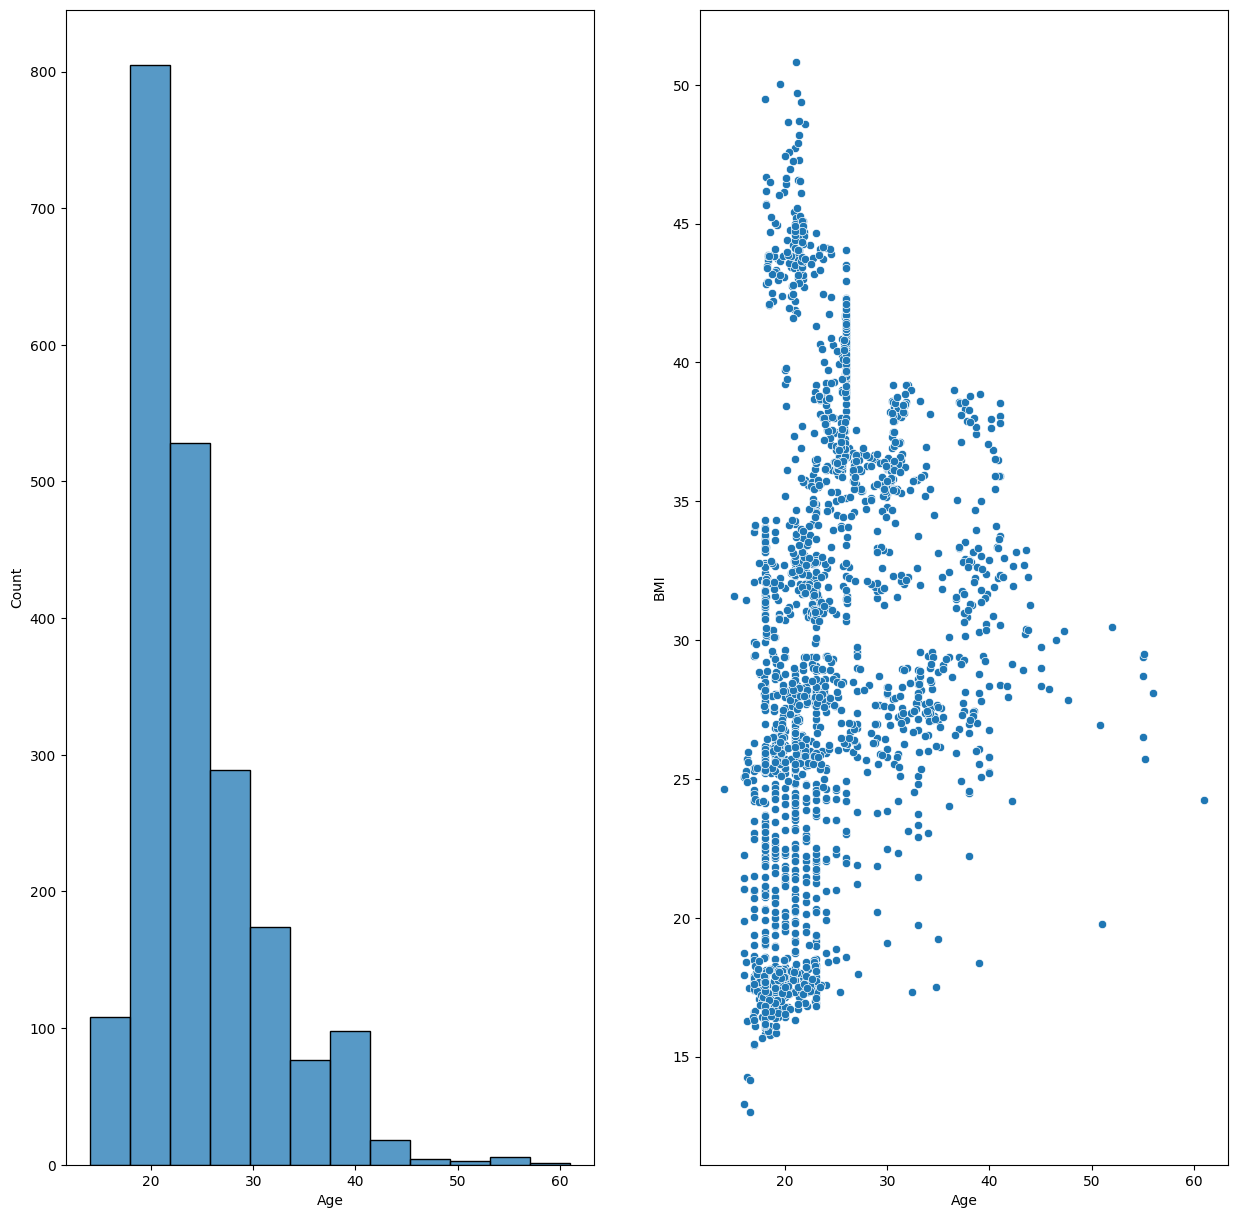

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes = axes.flatten()
sns.histplot(x = "Age", data=data_new, bins =12, ax = axes[0])
sns.scatterplot(x = "Age", y= "BMI" ,data=data_new, ax=axes[1])
plt.show()

From the above diagrams, we can see that most of our samples are concentrated between the ages of 18 - 30 years old and have also the highest variance in BMI. As long as the Age increases, we can see that the BMI variance degrades. Thus, we need to investigate the habits of the age groups apart from Height and Weight to see which contributes the most to higher BMI

We need to engineer a new feature for our data analysis to bin the Age groups to have a clearer picture of the feature distributions. The age groups are going to be 3, Child, Young Adult, and Adult, since we do not have much sample abe the Age of 30

## 1.3 Age Group Visualization

In [16]:
def age_group(age):
  if age <= 18:
    return "Child"
  elif age <= 30:
    return "Young Adult"
  else:
    return "Adult"

In [17]:
data_new['AgeGroup'] = data_new['Age'].apply(age_group)

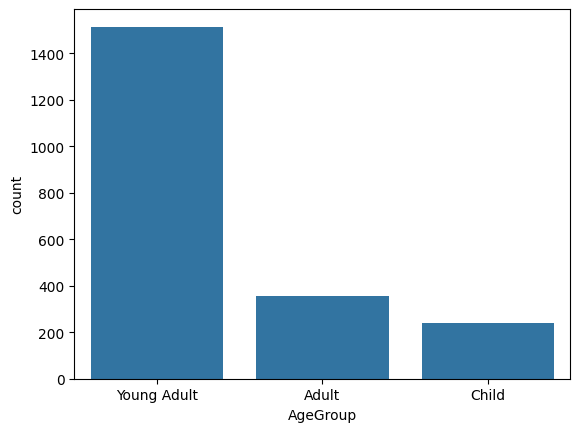

In [18]:
sns.countplot(x = "AgeGroup", data=data_new)
plt.show()

In [19]:
numeric_factors = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
data_new.groupby("AgeGroup")[numeric_factors].mean()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
AgeGroup,,,,,,,,
Adult,35.890086,1.703388,91.578876,2.391005,2.567689,1.871574,0.940622,0.375234
Child,17.534349,1.709708,67.416256,2.276202,2.818421,1.889643,1.147799,0.934327
Young Adult,22.669254,1.699997,88.463521,2.448373,2.692222,2.058935,1.004794,0.680316


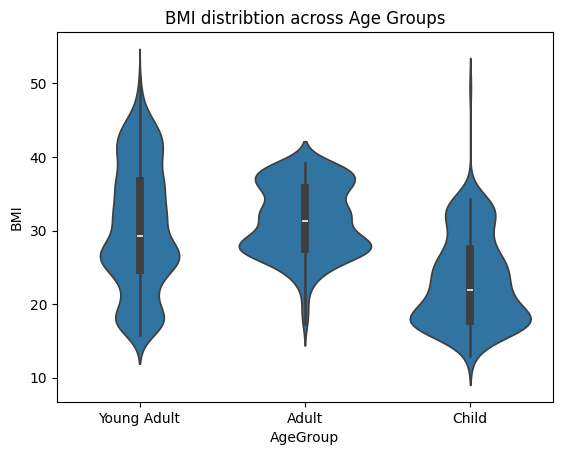

In [20]:
sns.violinplot(x = "AgeGroup", y = "BMI", data=data_new)
plt.title("BMI distribtion across Age Groups")
plt.show()

Young adults have a more balanced distribution across BMI metrics due to a larger sample size. In contrast, most adults tend to have their BMI concentrated primarily between 28 and 40 on average. Children show a more equal distribution across a range up to 18 BMI, but their numbers decline as BMI increases.

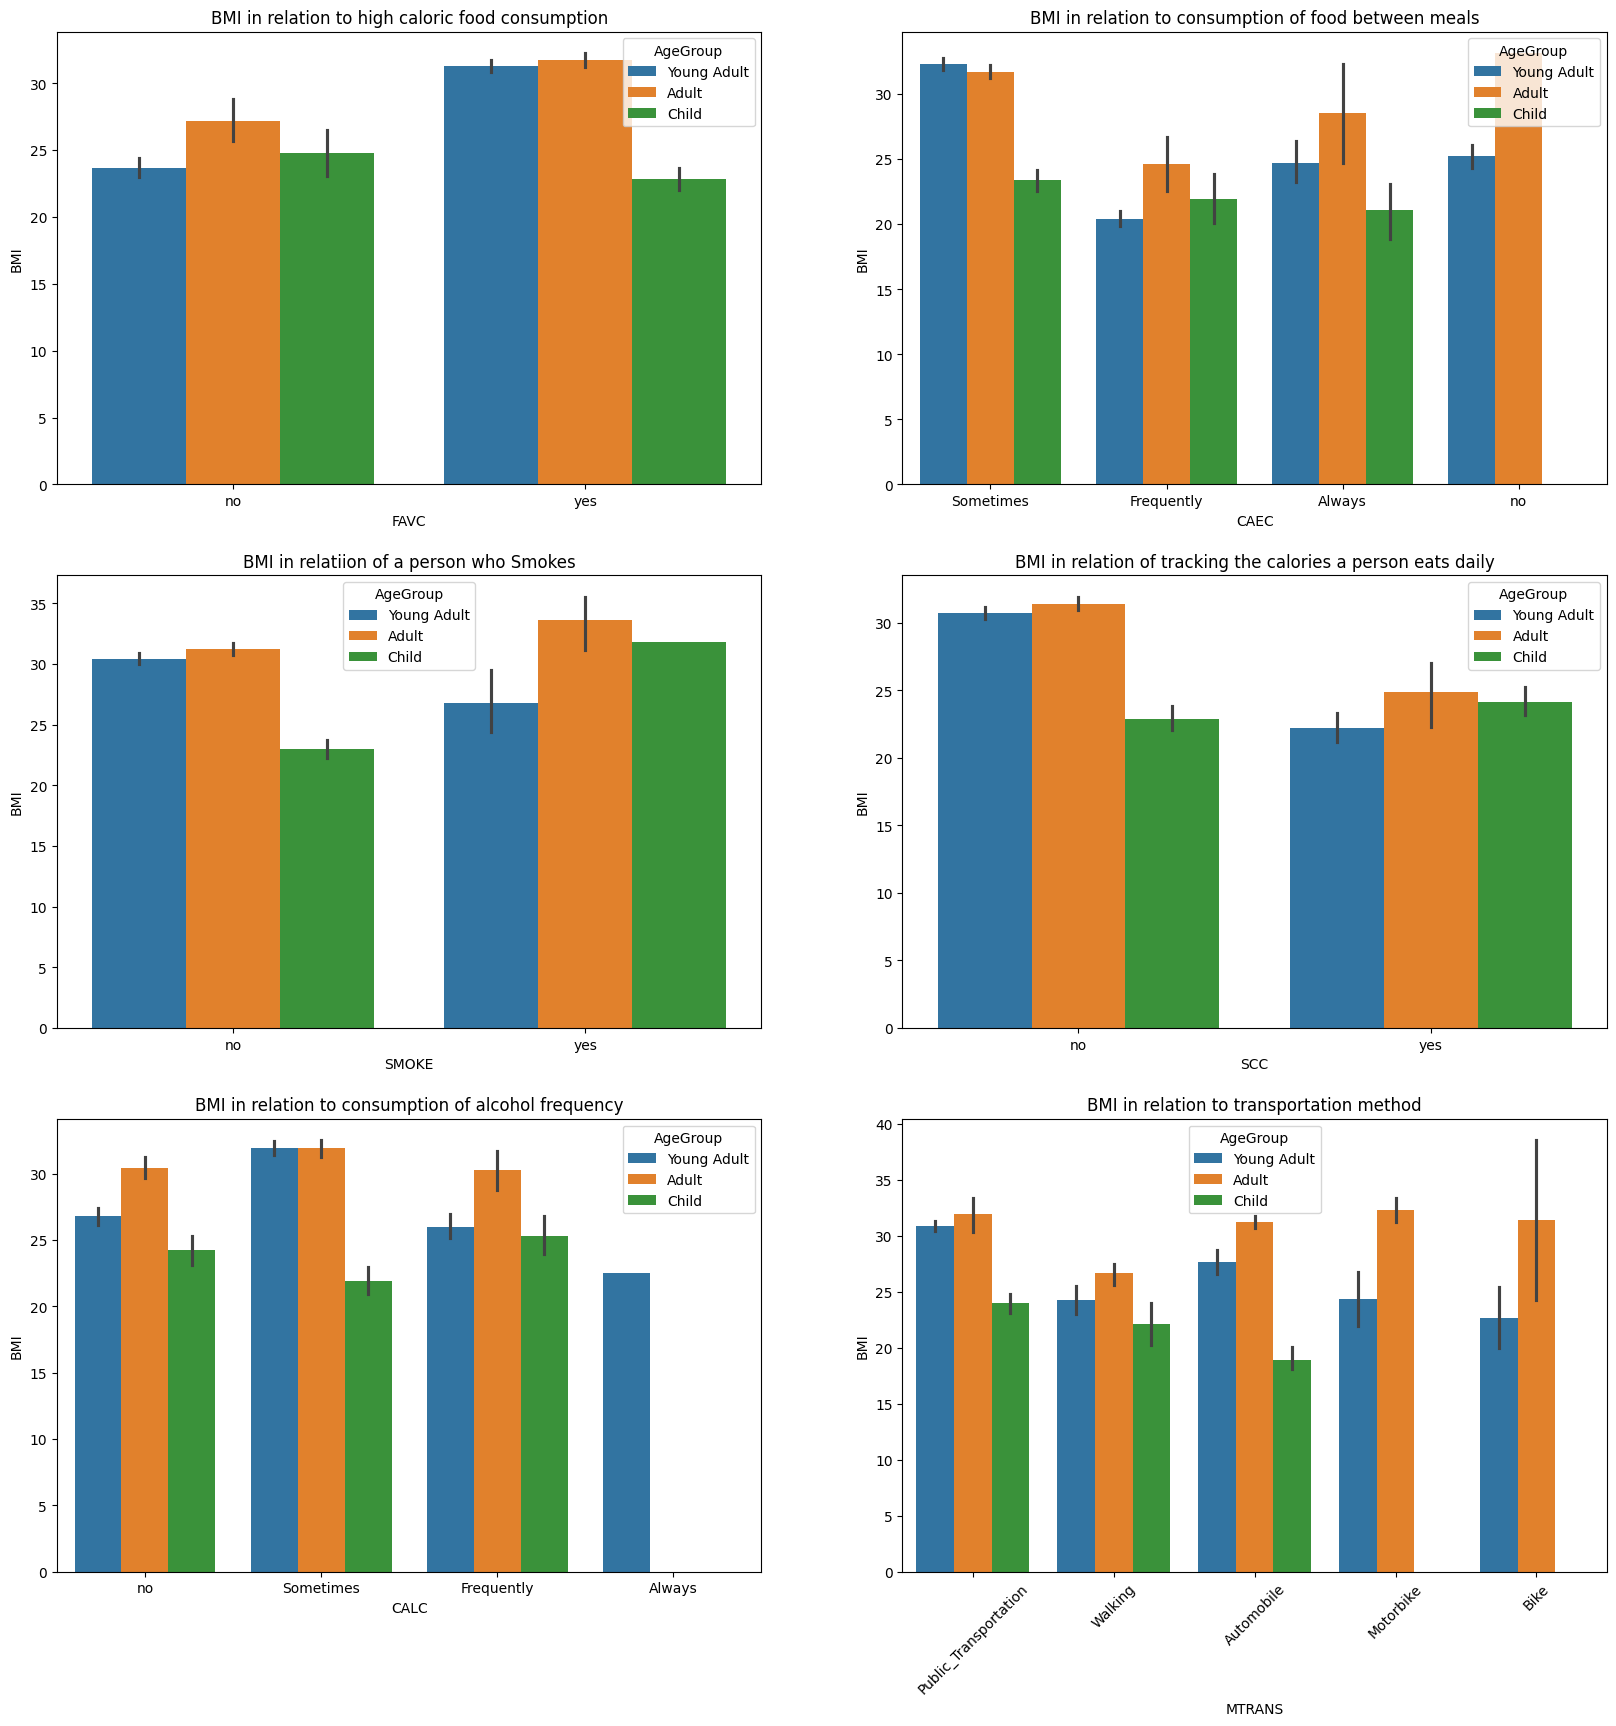

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes.flatten()
#sns.barplot(y='BMI', x='family_history_with_overweight', data=data_new, ax=axes[0][0], hue= "Gender", estimator="mean")
#axes[0][0].set_title("BMI in relation to Family History")
sns.barplot(y = "BMI", x='FAVC', data=data_new, ax=axes[0][0], estimator="mean", hue= "AgeGroup")
axes[0][0].set_title("BMI in relation to high caloric food consumption")
sns.barplot(y = "BMI", x="CAEC" , data=data_new ,ax=axes[0][1], estimator="mean", hue= "AgeGroup")
axes[0][1].set_title("BMI in relation to consumption of food between meals")
sns.barplot(y = "BMI", x= "SMOKE", data=data_new ,ax=axes[1][0], estimator="mean", hue= "AgeGroup")
axes[1][0].set_title("BMI in relatiion of a person who Smokes")
sns.barplot(y = "BMI", x= "SCC", data=data_new ,ax=axes[1][1], estimator="mean", hue= "AgeGroup")
axes[1][1].set_title("BMI in relation of tracking the calories a person eats daily")
sns.barplot(y = "BMI", x= "CALC", data=data_new ,ax=axes[2][0], estimator="mean", hue= "AgeGroup")
axes[2][0].set_title("BMI in relation to consumption of alcohol frequency")
sns.barplot (y= "BMI", x = "MTRANS", data=data_new ,ax = axes[2][1], estimator="mean", hue= "AgeGroup" )
axes[2][1].set_title("BMI in relation to transportation method")
axes[2][1].tick_params(axis='x', rotation=45)
plt.show()

We can see that young Adults are consuming alochol more Frequently that the rest of the others. However on the rest of the features, mean values are showing that they pretty much have the same habits as the rest of the Age Groups.

However this difference in the BMI is causes by the sample imbalance

Next we will have to see the Gender Distributions to see if we have a balanced dataset and see if there is a specific Gender which is most sensitive to BMI

## 1.4 Gender Visualizations

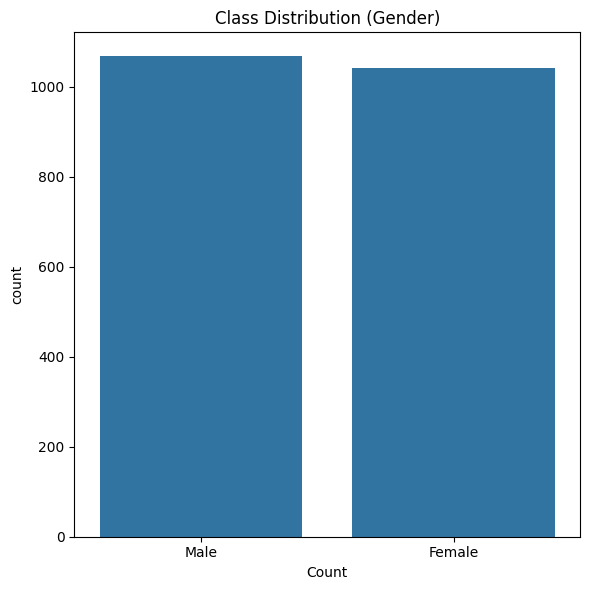

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x="Gender", order=data["Gender"].value_counts().index)
plt.title("Class Distribution (Gender)")
plt.xlabel("Count")
plt.tight_layout()

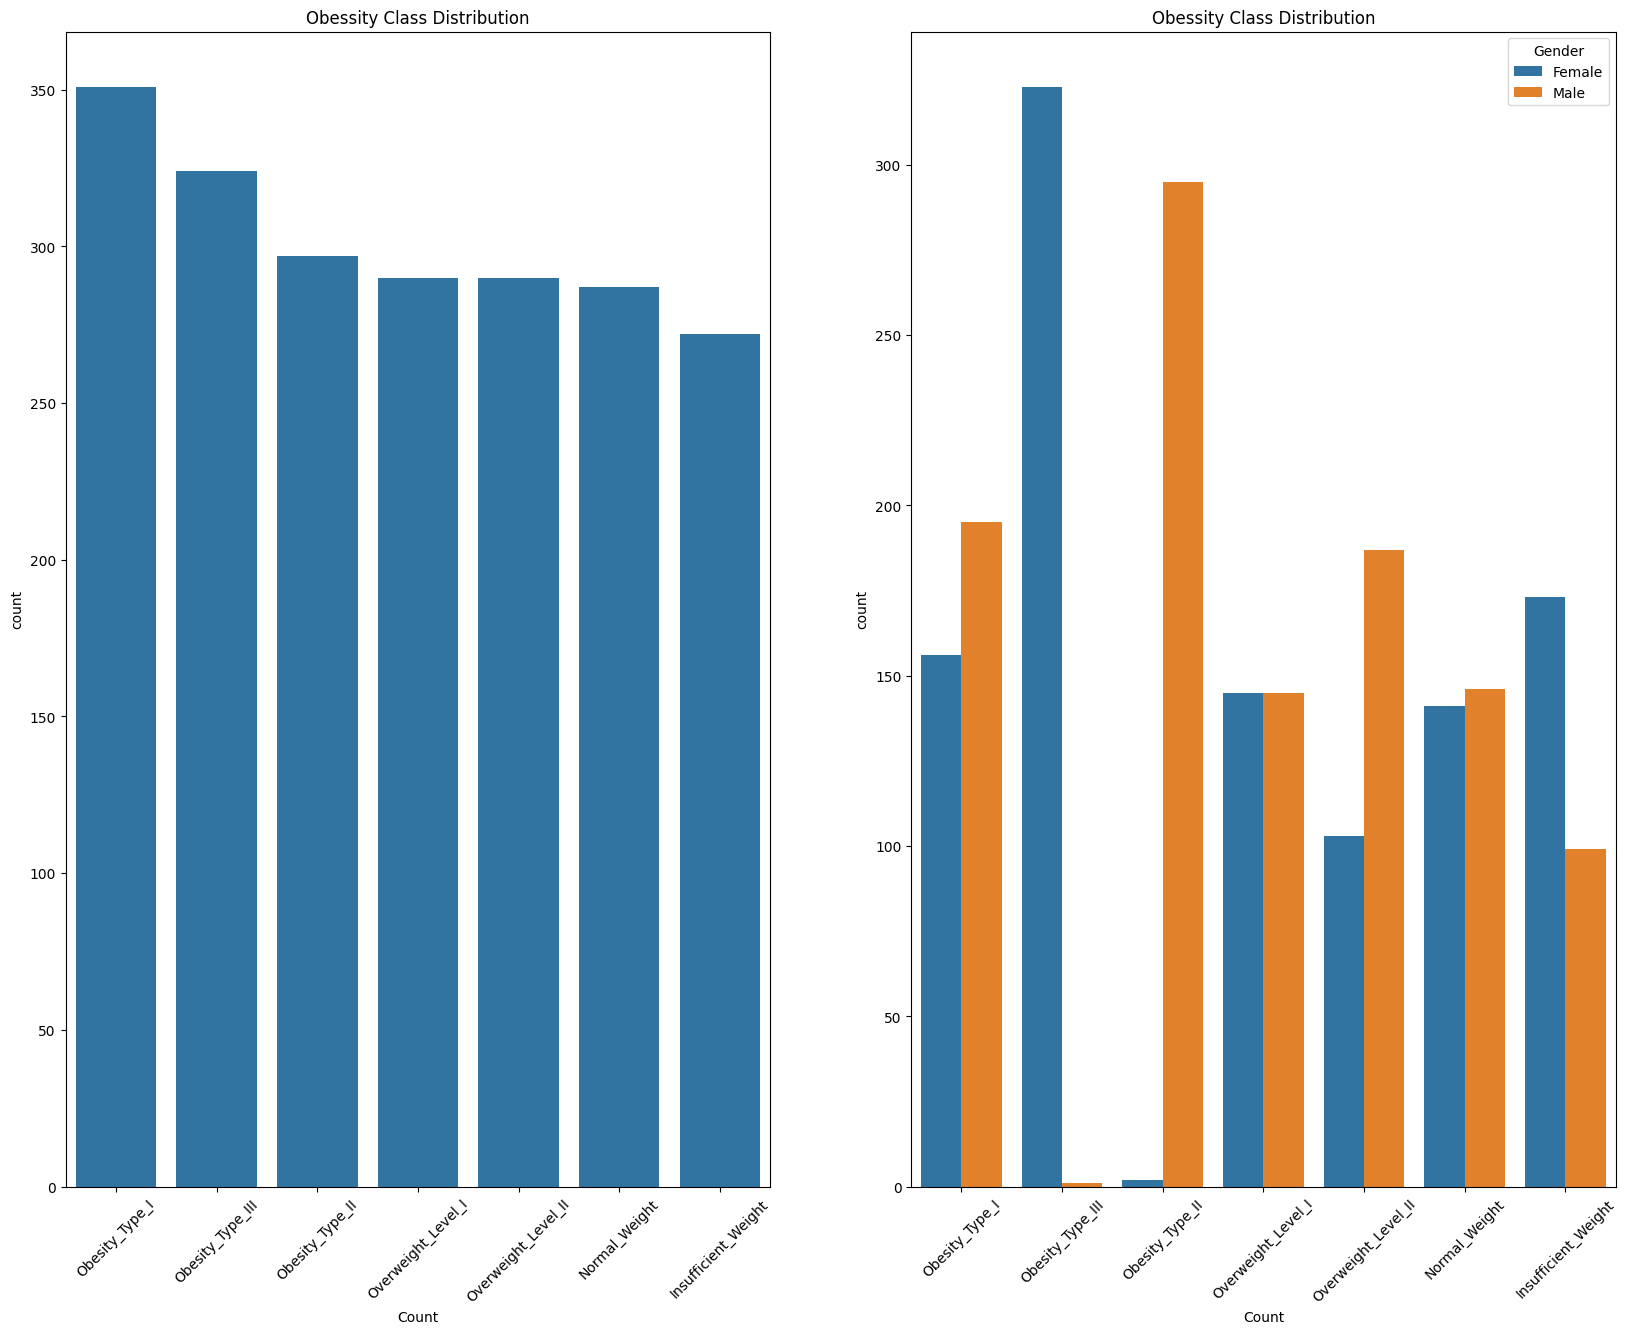

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
axes.flatten()

sns.countplot(data=data_new, x="NObeyesdad", order=data_new["NObeyesdad"].value_counts().index, ax=axes[0])
axes[0].set_title("Obessity Class Distribution")
axes[0].set_xlabel("Count")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=data_new, x="NObeyesdad", order=data_new["NObeyesdad"].value_counts().index, hue = "Gender" , ax=axes[1])
axes[1].set_title("Obessity Class Distribution")
axes[1].set_xlabel("Count")
axes[1].tick_params(axis='x', rotation=45)

From the above plot, we can see the class distributions on the dataset for the whole sample and categorized by gender. We can see that women in our dataset are highly sensitive to Insufficient weight and Obesity Type 3, which is the highest one.
To explore why this happens we need to focus on the factors that compute BMI, Height and Weight

Text(0.5, 1.0, 'Height in relation to Weight, and categorized by Gender')

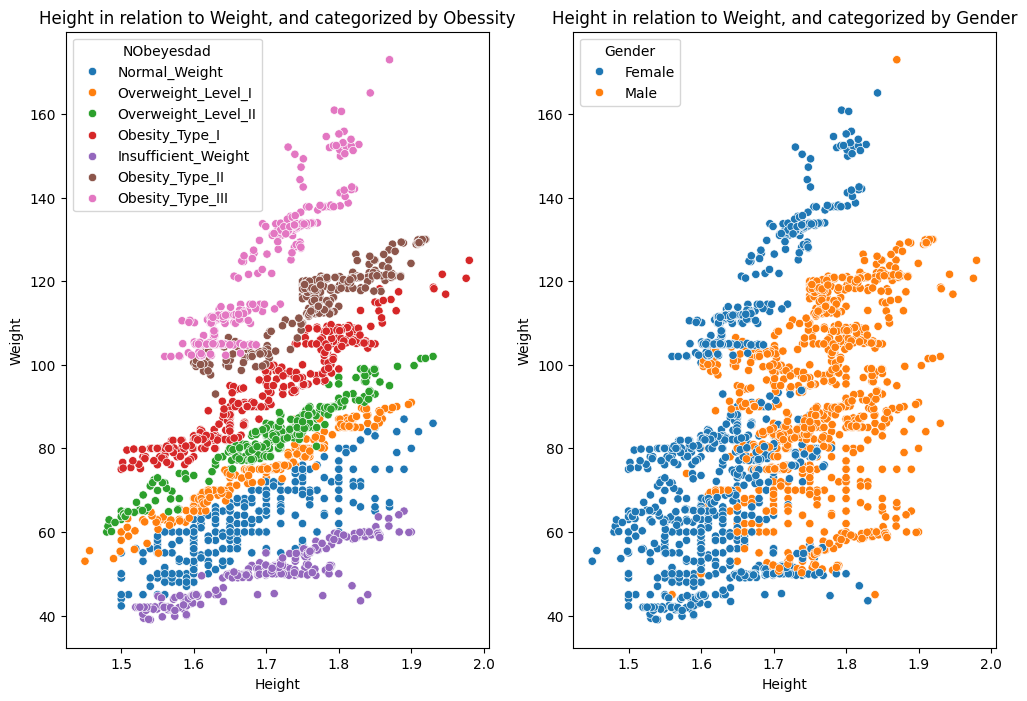

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes.flatten()
sns.scatterplot(x='Height', y='Weight', hue = 'NObeyesdad' , data=data_new, ax = axes[0])
axes[0].set_title("Height in relation to Weight, and categorized by Obessity")
sns.scatterplot(x='Height', y='Weight', hue = 'Gender' , data=data_new, ax = axes[1])
axes[1].set_title("Height in relation to Weight, and categorized by Gender")




We can see a high postitive correlation between height and weight, and that on the height, as the weight increases, we

From the above we can conclude that women in the dataset have lower height than men and their weights are increase assymetrically, while men have heigher height across their sample and a more symmetrical distribution among their weights

In [25]:
data_new.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,AgeGroup
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Young Adult
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Young Adult
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Young Adult
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Young Adult
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Young Adult


<Axes: xlabel='BMI', ylabel='Count'>

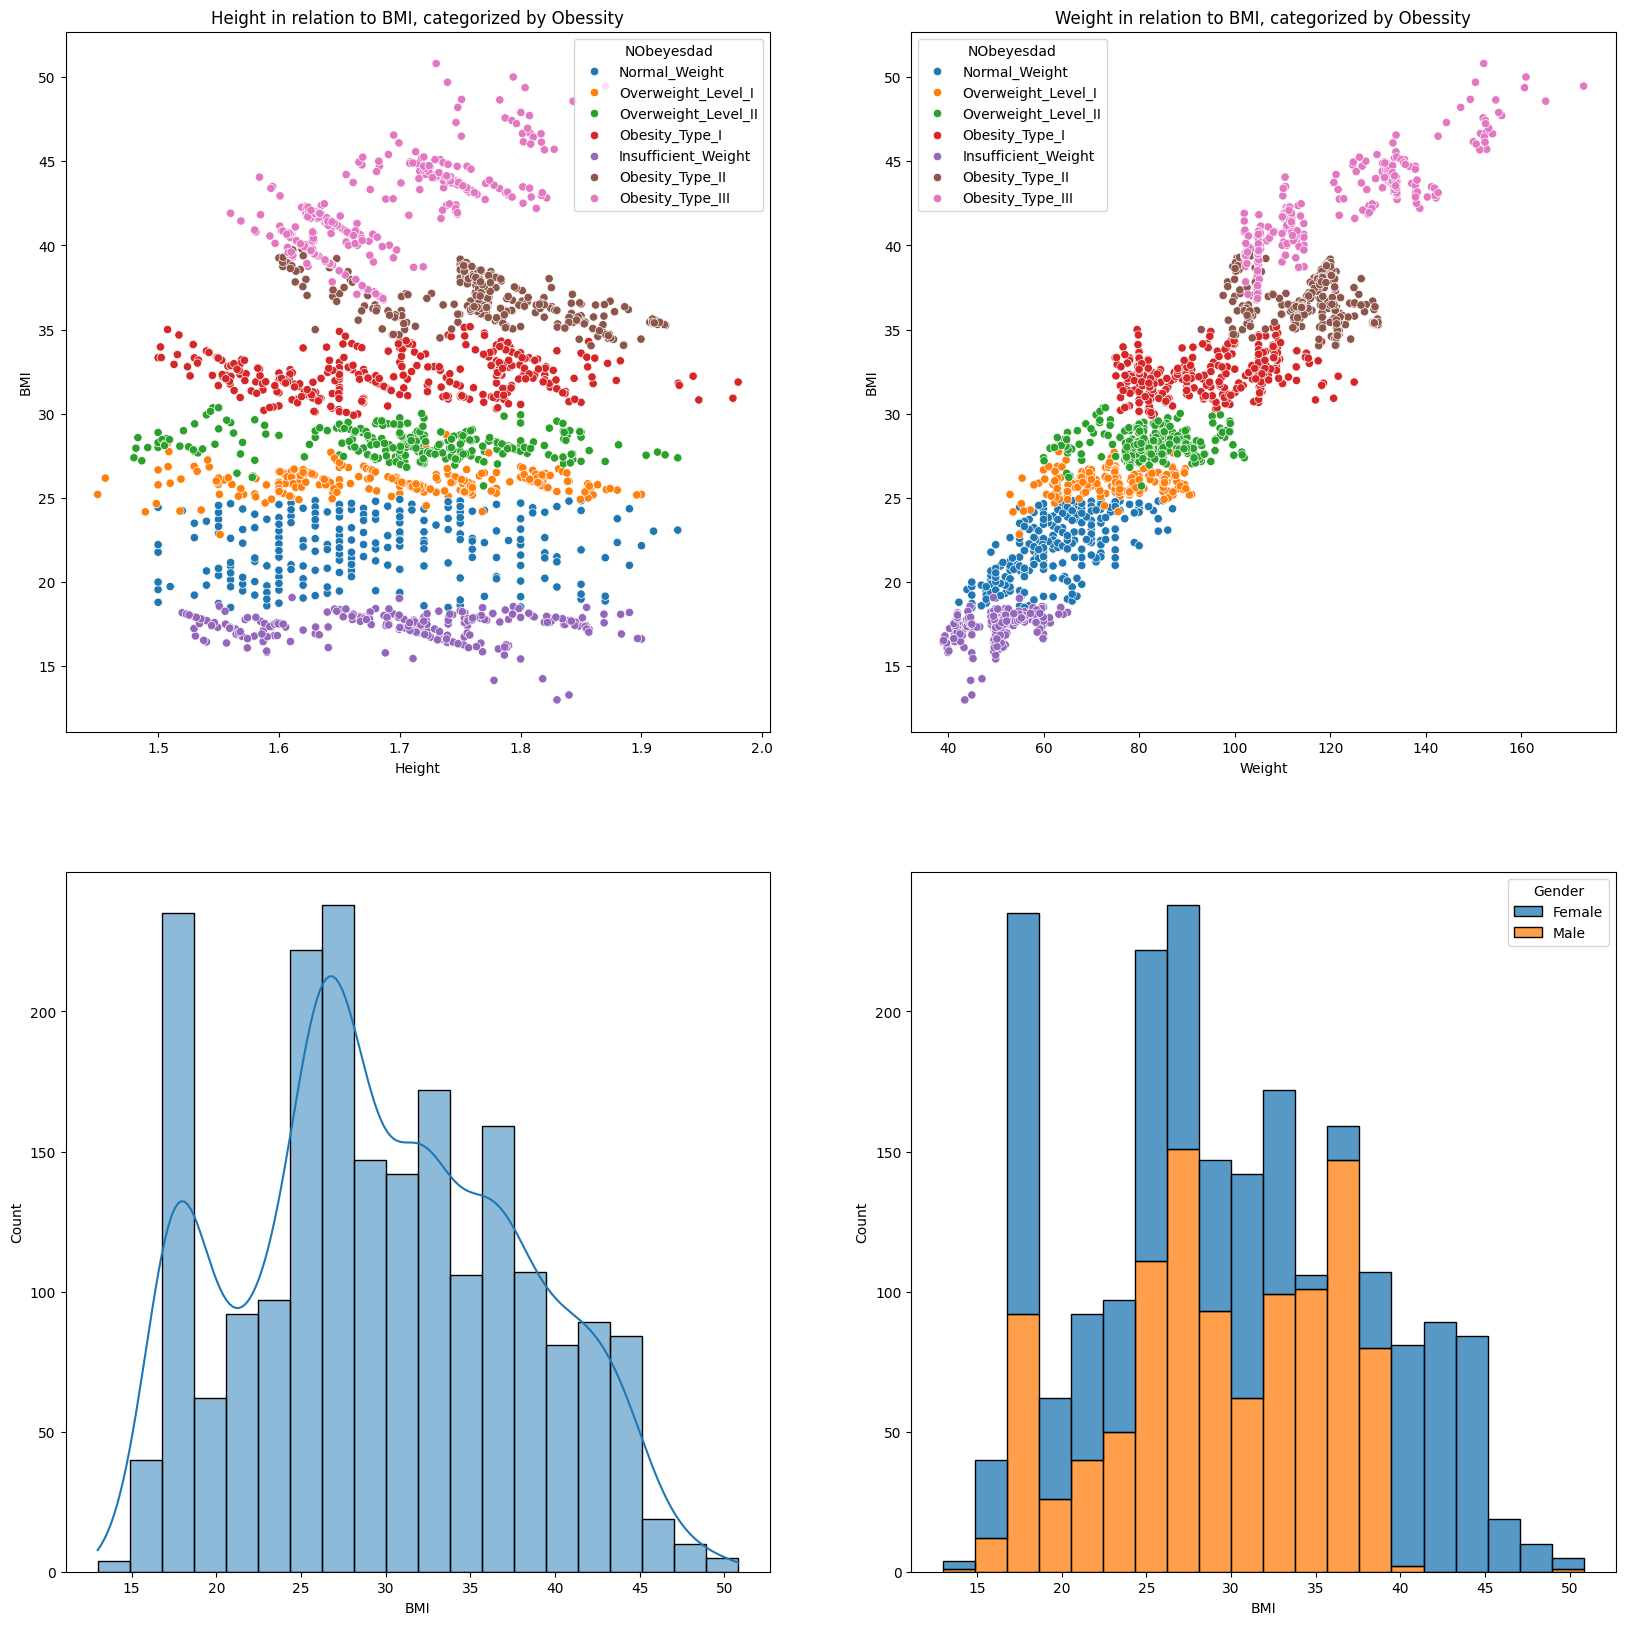

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes.flatten()
sns.scatterplot(x='Height', y='BMI', hue = 'NObeyesdad' , data=data_new, ax=axes[0][0])
ax=axes[0][0].set_title("Height in relation to BMI, categorized by Obessity")
sns.scatterplot(x='Weight', y='BMI', hue = 'NObeyesdad' , data=data_new, ax=axes[0][1])
axes[0][1].set_title("Weight in relation to BMI, categorized by Obessity")
sns.histplot(x = "BMI", bins =20, kde= True, data=data_new, ax=axes[1][0])
axes[1][0]
sns.histplot(x = "BMI", bins =20, data=data_new, ax=axes[1][1], hue = "Gender", multiple = 'stack')

Next steps is ot find which of the categorical and numeric features from the daily habits most affect the BMI.

In [27]:
data.groupby("Gender")[numeric_factors].mean()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Gender,,,,,,,,
Female,24.001907,1.643298,82.302364,2.567319,2.632419,1.941083,0.847137,0.647227
Male,24.616020,1.758690,90.769478,2.274238,2.737592,2.073373,1.169639,0.668256


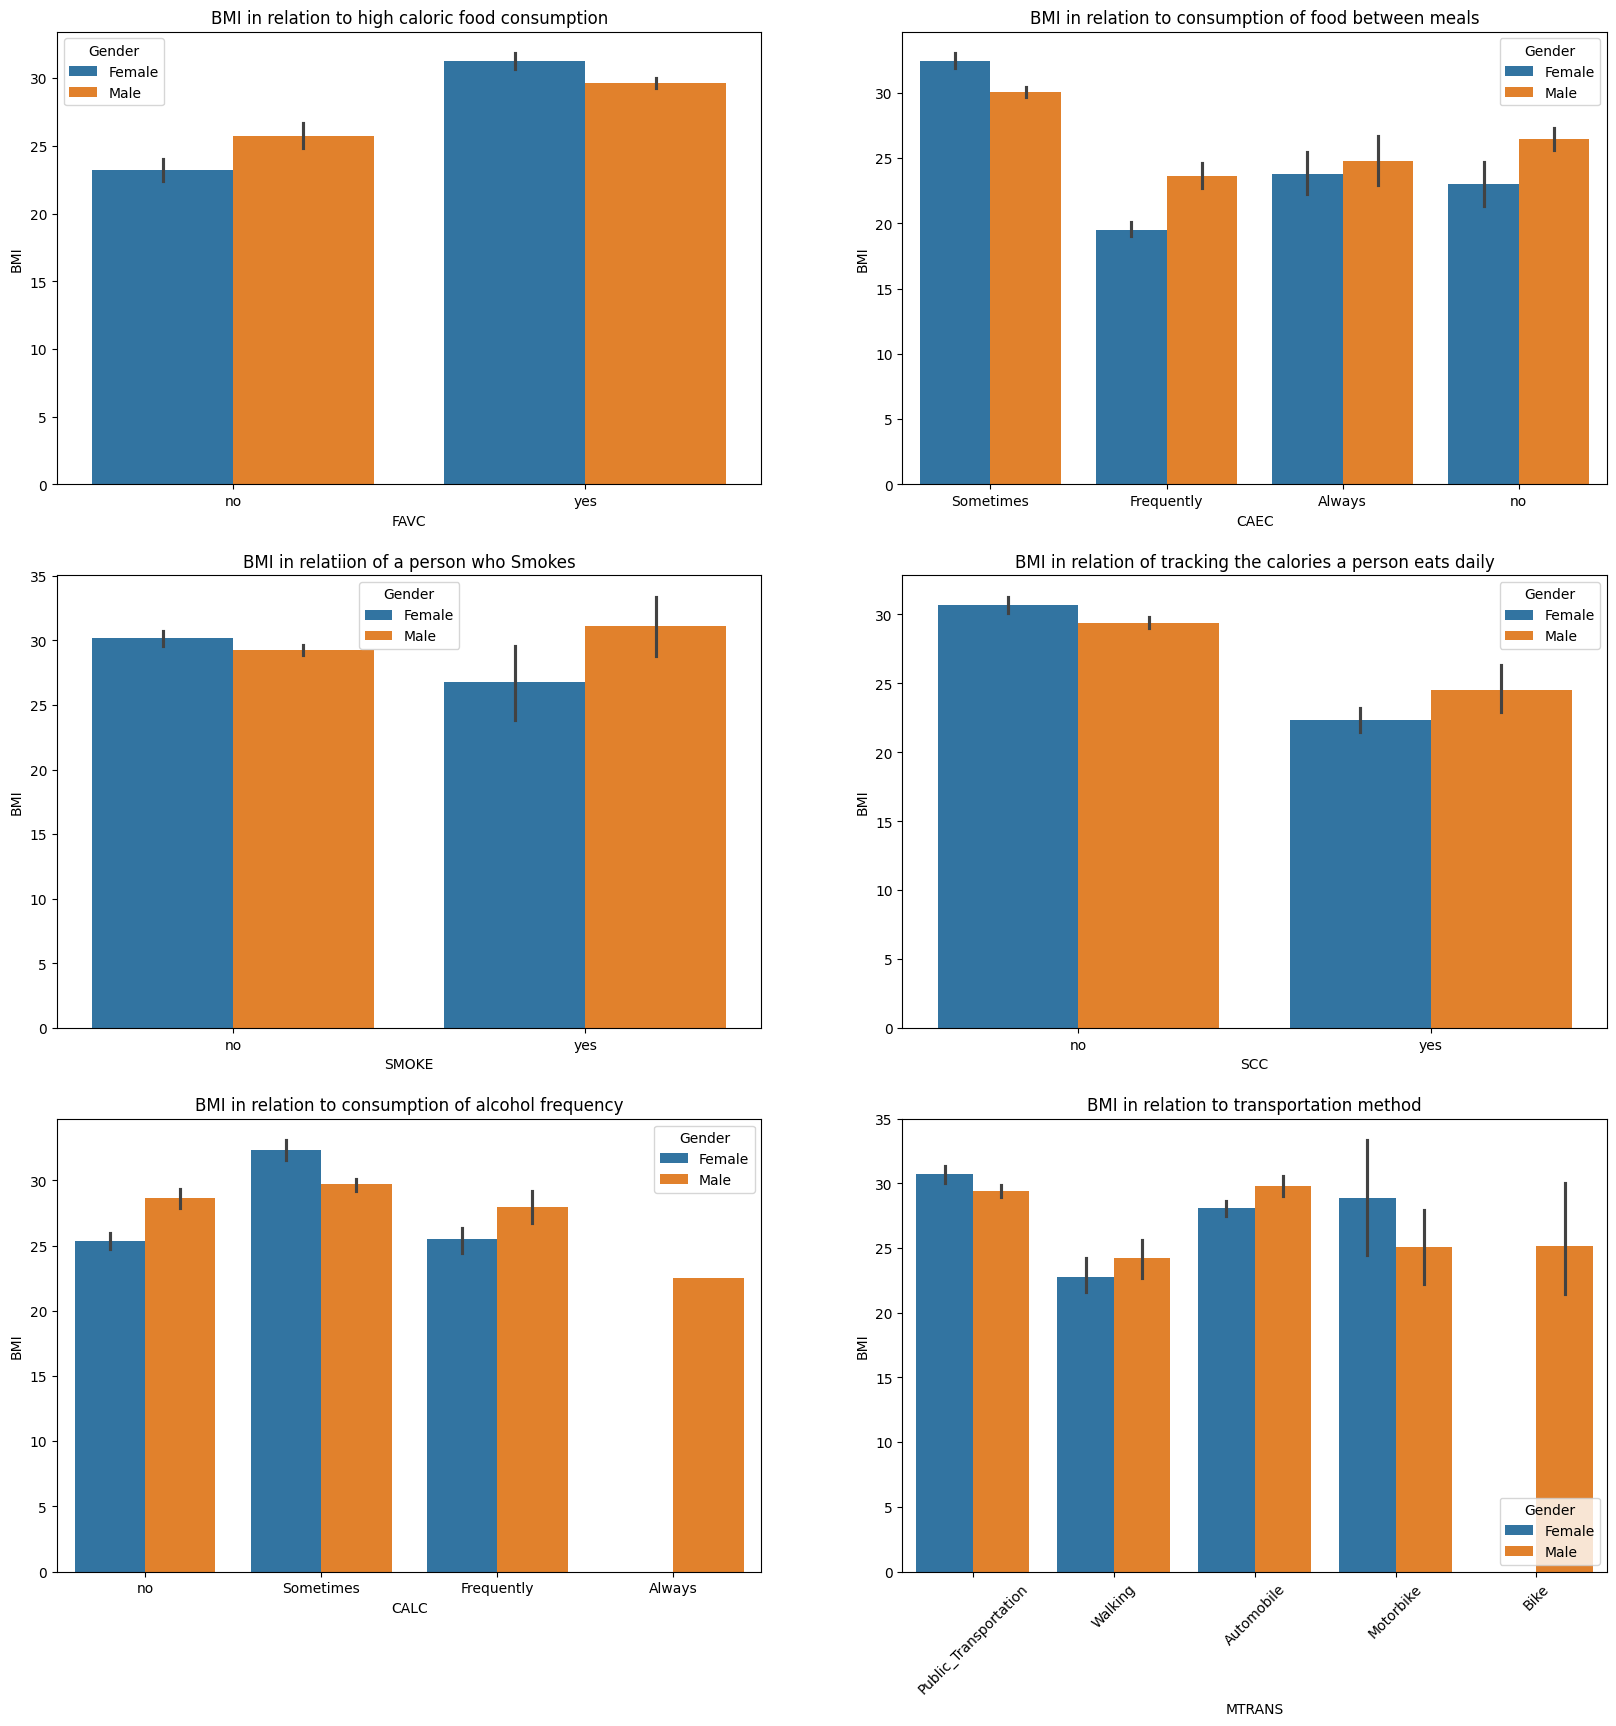

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes.flatten()
#sns.barplot(y='BMI', x='family_history_with_overweight', data=data_new, ax=axes[0][0], hue= "Gender", estimator="mean")
#axes[0][0].set_title("BMI in relation to Family History")
sns.barplot(y = "BMI", x='FAVC', data=data_new, ax=axes[0][0], estimator="mean", hue= "Gender")
axes[0][0].set_title("BMI in relation to high caloric food consumption")
sns.barplot(y = "BMI", x="CAEC" , data=data_new ,ax=axes[0][1], estimator="mean", hue= "Gender")
axes[0][1].set_title("BMI in relation to consumption of food between meals")
sns.barplot(y = "BMI", x= "SMOKE", data=data_new ,ax=axes[1][0], estimator="mean", hue= "Gender")
axes[1][0].set_title("BMI in relatiion of a person who Smokes")
sns.barplot(y = "BMI", x= "SCC", data=data_new ,ax=axes[1][1], estimator="mean", hue= "Gender")
axes[1][1].set_title("BMI in relation of tracking the calories a person eats daily")
sns.barplot(y = "BMI", x= "CALC", data=data_new ,ax=axes[2][0], estimator="mean", hue= "Gender")
axes[2][0].set_title("BMI in relation to consumption of alcohol frequency")
sns.barplot (y= "BMI", x = "MTRANS", data=data_new ,ax = axes[2][1], estimator="mean", hue= "Gender" )
axes[2][1].set_title("BMI in relation to transportation method")
axes[2][1].tick_params(axis='x', rotation=45)
plt.show()

Our data suggest that lifestyle habits are a key determinant for weight, and there fore BMI, but their impact differs by gender. Women in the sample weigh ≈ 8 kg less than men yet stand about 11 cm shorter, a height gap that leaves them with a higher average BMI despite their lower body weight. Because BMI is mathematically adjacent to both weight and height, this imbalance in height makes females appear more sensitive to obesity. The next step is to examine which behavioral numeric factors—beyond these categorical ones—contribute most to BMI variation across the population.

## 1.5 Family History Visualizations and Feature Correlation Heatmap

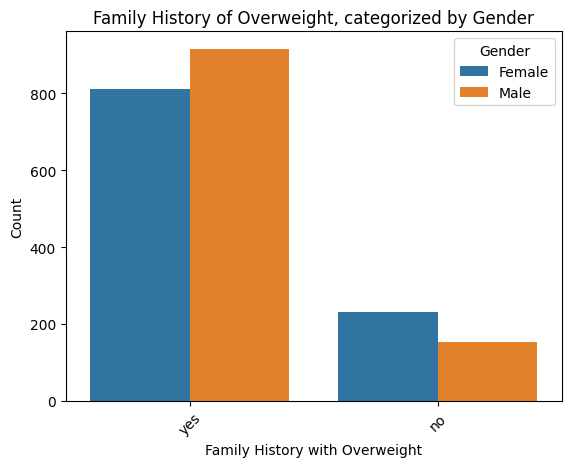

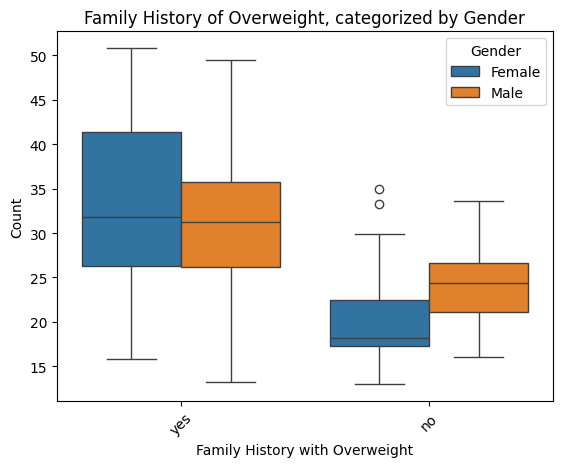

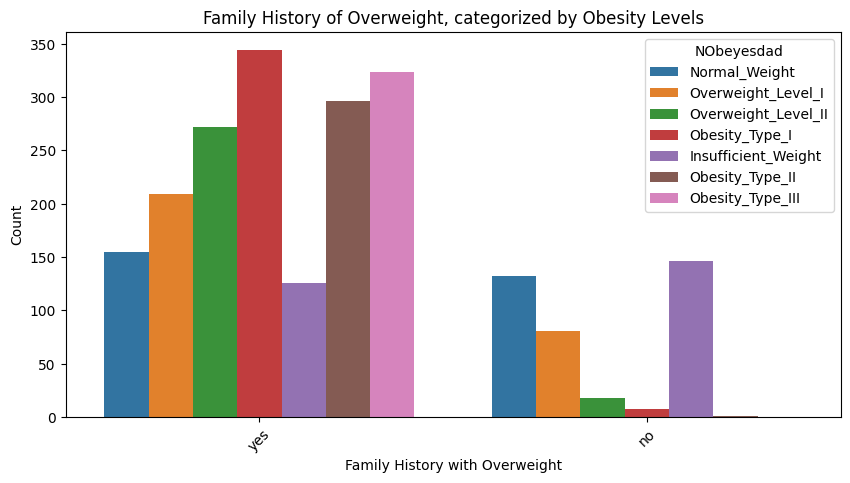

In [29]:
sns.countplot(x = "family_history_with_overweight", hue = "Gender" , data=data_new)
plt.title("Family History of Overweight, categorized by Gender")
plt.xlabel("Family History with Overweight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
sns.boxplot(x = "family_history_with_overweight", hue = "Gender" ,y = "BMI", data=data_new)
plt.title("Family History of Overweight, categorized by Gender")
plt.xlabel("Family History with Overweight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x="family_history_with_overweight", hue="NObeyesdad", data=data)
plt.title("Family History of Overweight, categorized by Obesity Levels")
plt.xlabel("Family History with Overweight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The Genders are pretty much equally distrivuted between the two classes.

If a person has a family history of overweight, is more sensistive to higher BMI, however we can see that we have approximetely 400 sampes of persons that have no family history of overweight and go up to approximately 35 BMI maximum. From persons that have a family history, there are person with insufficinet weight, up to obesity type 3, which is the highest obesity level

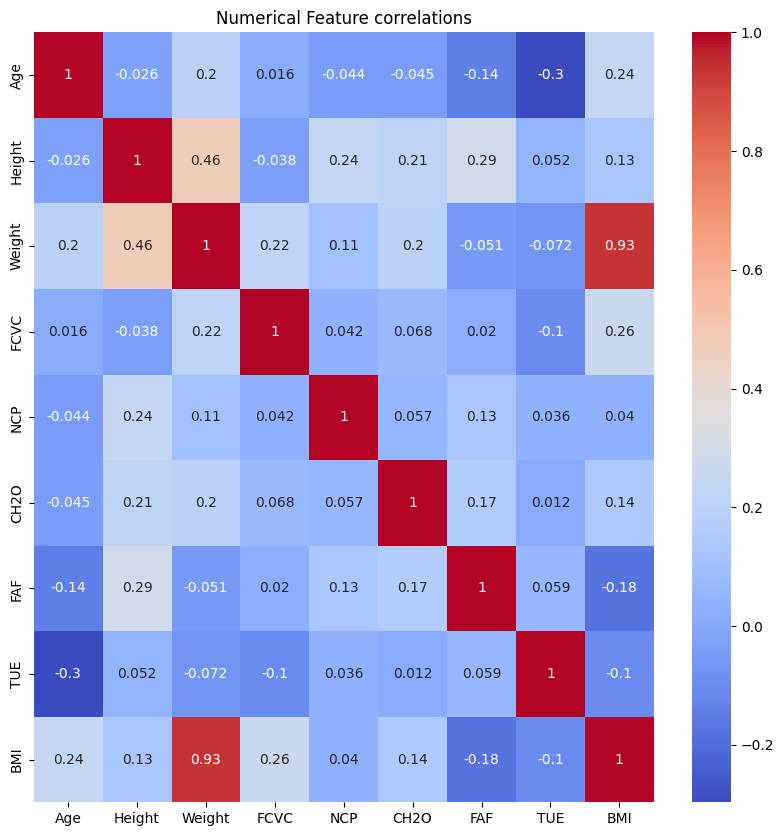

In [30]:
plt.figure(figsize=(10, 10))
correlations = data_new[numeric_factors + ["BMI"]].corr() # Corelate numerical in relation to BMI / drop is not to include the self repaltion to the BMI Column
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Numerical Feature correlations")
plt.show()

The analysis indicates that persons with more stable eating habits, such as monitoring their calorie intake, eating between meals more frequently or in stable basis, or do not eat at all, tend to have a lower Body Mass Index (BMI) compared to those who eat irregularly. Other factors do not appear to be correalted with this outcome.

There is a positive correlation between the consumption of high-calorie foods and BMI.

From the data we observe that people who eat more vegetables also show a positive correlation with BMI. We need to investigate whether this is related to high-calorie food consumption and the number of daily meals.

Additionally, increased physical activity and reduced use of electronic devices are associated with lower BMI.educed use of electronic devices are associated with lower BMI.

The electronic devices usage and  the physical activity ratio degrades

In [31]:
subset = data_new[['BMI', 'FCVC', 'NCP', 'FAF']].copy()
subset['FAVC_yes'] = (data_new['FAVC'] == 'yes').astype(int)
subset.head()

,BMI,FCVC,NCP,FAF,FAVC_yes
0,24.386526,2.0,3.0,0.0,0
1,24.238227,3.0,3.0,3.0,0
2,23.765432,2.0,3.0,2.0,0
3,26.851852,3.0,3.0,2.0,0
4,28.342381,2.0,1.0,0.0,0


In [32]:
subset['Family_History_overweight'] = (data_new['family_history_with_overweight'] == 'yes').astype(int)

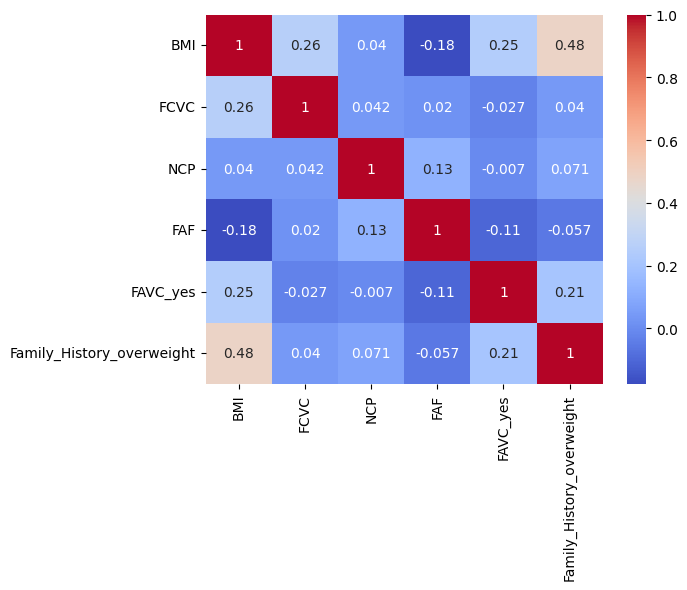

In [33]:
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')

plt.show()

From the above, we can conclude that a person who has more physical activity, consumes slightly less caloric food, and eats slightly more vegetables has a lower BMI than a person who eats high-caloric food, eats fewer vegetables, and does not have less activity. Family history, if it is correlated with the above factors, will have a big difference in BMI. For example, if two persons do the same thing, one has a family history, and the another does not, they will have different results in BMI.

We can conclude that the persons that eat vegetables have higher BMI not because of the vegetables, but also because they consume high-caloric food also, and based on their family history.

In the transportation method we could convert the values Automobile, Motorbike, or Public_Transportation that use an automotive in general to move, and they do not use a bike or walking as their transportation, which requires more physical activity; however, we do not have the time metrics of the usage of these means for each person, thus the model may not be accurate since people that may use public transportation might have less time available to adjust their habits; thus, we will only transform and merge the Motorbike or Automobile values.

## 1.6 Lifestyle

In [34]:
data_new['MTRANS'] = data_new['MTRANS'].apply(lambda x: 'Automotive' if x in ['Automobile', 'Motorbike'] else x)

In [35]:
data_new.groupby("MTRANS")["MTRANS"].count()

,MTRANS
MTRANS,
Automotive,468
Bike,7
Public_Transportation,1580
Walking,56


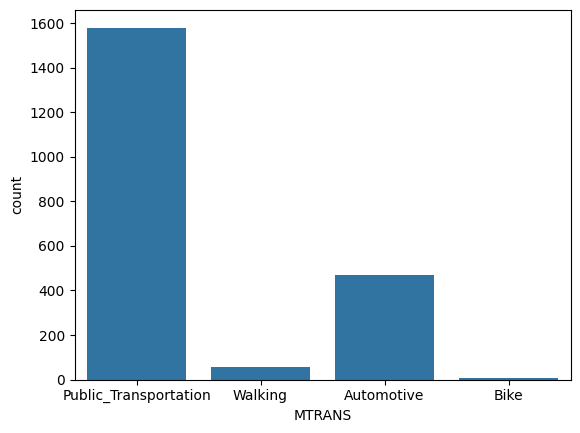

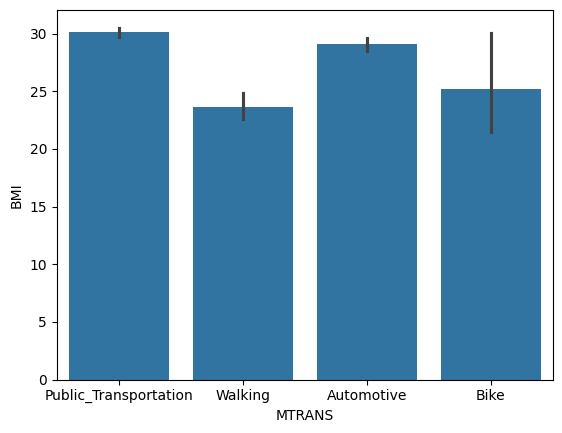

In [36]:
sns.countplot(x = "MTRANS", data= data_new)
plt.show()
sns.barplot(x = "MTRANS", y = "BMI", data = data_new, estimator="mean")
plt.show()

We can see that the MTRANS features are unbalanced, which can cause issues later and false assumptions regarding the habits. However, we do not have the background to examine if Walking or moving by bike causes less BMI in total

We will need to enginner a new features based on the habits of the persons who do not smoke, their eating habits are stable, and they conduct physical activity since they appear for the previous diagrams to have a lower BMI in total.
Of course the family history also contributes but we will examine it later

In [37]:
def healthy_lifestyle(smoke, faf, caec):
  if smoke == "no" and faf >=2 and caec !="Sometimes":
    return 1
  else:
    return 0

In [38]:
data_new["Healthy_Lifestyle"] = data_new.apply(lambda x: healthy_lifestyle(x["SMOKE"], x["FAF"], x["CAEC"]), axis=1)

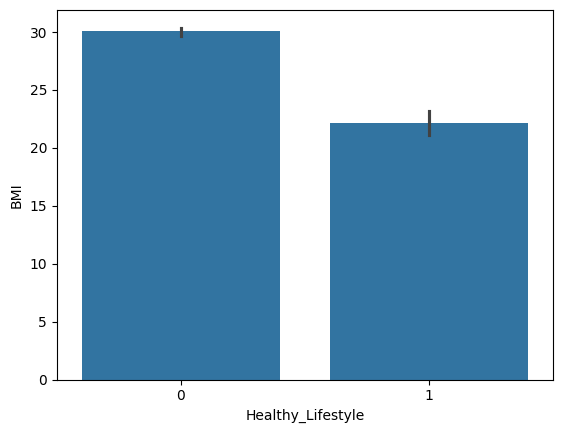

In [39]:
sns.barplot(x = "Healthy_Lifestyle", y = "BMI", data=data_new)
plt.show()

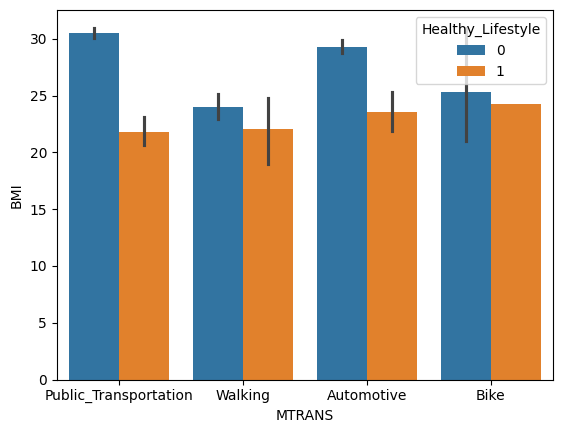

In [40]:
sns.barplot(x = "MTRANS", y = "BMI", data = data_new, hue= "Healthy_Lifestyle" ,estimator="mean")
plt.show()

In [41]:
data_new.groupby(["Healthy_Lifestyle", "AgeGroup", "MTRANS"])["AgeGroup"].count()

Healthy_Lifestyle  AgeGroup     MTRANS               
0                  Adult        Automotive                281
                                Bike                        1
                                Public_Transportation      64
                                Walking                     3
                   Child        Automotive                 35
                                Public_Transportation     175
                                Walking                    15
                   Young Adult  Automotive                137
                                Bike                        5
                                Public_Transportation    1275
                                Walking                    28
1                  Adult        Automotive                  4
                                Bike                        1
                                Public_Transportation       1
                                Walking                     1
                   Child        Automotive                  1
                                Public_Transportation      11
                                Walking                     4
                   Young Adult  Automotive                 10
                                Public_Transportation      54
                                Walking                     5
Name: AgeGroup, dtype: int64

We can conclude that persons that have a healthy lifestyle in general, disregarding their moving type, have a lower BMI in General. However we will need more samples for more in - depth analyis

In [42]:
data_new.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,AgeGroup,Healthy_Lifestyle
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Young Adult,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Young Adult,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Young Adult,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Young Adult,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Young Adult,0


# 2.Regressions

## 2.1 Preprocessing

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [44]:
target_cols = ['Gender','family_history_with_overweight','FAVC','SCC','CALC','MTRANS', 'CAEC','SMOKE']#
numeric_cols = [i for i in numeric_factors if i not in ['Weight']] + ['Healthy_Lifestyle']
y = data_new['Weight']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    data_new[target_cols + numeric_cols], y, test_size=0.2, random_state=42
)

In [45]:
X_train_raw.head()

,Gender,family_history_with_overweight,FAVC,SCC,CALC,MTRANS,CAEC,SMOKE,Age,Height,FCVC,NCP,CH2O,FAF,TUE,Healthy_Lifestyle
162,Female,yes,yes,no,Sometimes,Public_Transportation,Always,yes,21.000000,1.630000,3.000000,3.000000,2.000000,2.000000,0.000000,0
2001,Female,yes,yes,no,Sometimes,Public_Transportation,Sometimes,no,20.924956,1.752531,3.000000,3.000000,2.887659,1.480919,0.779641,0
1435,Female,yes,yes,no,Sometimes,Public_Transportation,Sometimes,no,22.899740,1.661715,1.203754,1.355354,2.765593,0.128342,1.659476,0
649,Female,no,no,no,no,Public_Transportation,Frequently,no,21.837996,1.588046,3.000000,1.696080,2.550307,1.098862,0.000000,0
1280,Male,yes,yes,no,Sometimes,Public_Transportation,Sometimes,no,25.994746,1.811602,3.000000,3.000000,2.858171,1.813318,0.680215,0


In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#Note: We did noy include any of the obessity to lower the leakage and reduce overfitting
encoder = OneHotEncoder(drop = 'first',  sparse_output=False)
X_train_obj = encoder.fit_transform(X_train_raw[target_cols])
X_test_obj = encoder.transform(X_test_raw[target_cols])
object_feature_names = encoder.get_feature_names_out(target_cols)

X_train_enc= pd.DataFrame(X_train_obj, columns=object_feature_names, index=X_train_raw.index)
X_test_enc = pd.DataFrame(X_test_obj, columns=object_feature_names, index=X_test_raw.index)

In [47]:
#Scale Num features to be acepted / Thelei kai meta
scaler = StandardScaler()
X_train_int = scaler.fit_transform(X_train_raw[numeric_cols])
X_test_int  = scaler.transform(X_test_raw[numeric_cols])

X_train_num_pivot = pd.DataFrame(X_train_int, columns=numeric_cols, index=X_train_raw.index)
X_test_num_pivot = pd.DataFrame(X_test_int,  columns=numeric_cols, index=X_test_raw.index)

X_train = pd.concat([X_train_enc, X_train_num_pivot], axis=1) #https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes
X_test = pd.concat([X_test_enc, X_test_num_pivot], axis=1)

In [48]:
X_train.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Public_Transportation,MTRANS_Walking,...,CAEC_no,SMOKE_yes,Age,Height,FCVC,NCP,CH2O,FAF,TUE,Healthy_Lifestyle
162,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.532646,-0.768029,1.076717,0.401513,-0.010142,1.186213,-1.069472,-0.215632
2001,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.544235,0.546078,1.076717,0.401513,1.446428,0.567871,0.224537,-0.215632
1435,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.239258,-0.427896,-2.268694,-1.700740,1.246128,-1.043353,1.684843,-0.215632
649,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,-0.403229,-1.217973,1.076717,-1.265210,0.892863,0.112755,-1.069472,-0.215632
1280,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.238722,1.179597,1.076717,0.401513,1.398040,0.963833,0.059515,-0.215632


In [49]:
numeric_cols

['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Healthy_Lifestyle']

In [50]:
model_map = [] # ftiaxnoume to map gia na doume pio exei ligotero error

## 2.2 Linear Regression

In [51]:
lr = LinearRegression(fit_intercept=True)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

if not any(d.get('model') == 'Linear Regression' for d in model_map): #Used the in-built colab assitant to fix an error on the keyword on 6/7/2025
    model_map.append({"model":"Linear Regression", "r2":lr_r2, "mse": lr_mse, "rmse": lr_rmse, "mae": lr_mae})

print(f'R^2: {lr_r2:.3f}')
print(f'MSE: {lr_mse:.3f}')
print(f'RMSE: {lr_rmse:.3f}')
print(f'MAE: {lr_mae:.3f}')

R^2: 0.577
MSE: 298.040
RMSE: 17.264
MAE: 13.840


In [52]:
train_rmse = np.sqrt(mean_squared_error(
                 y_train , lr.predict(X_train)))
print("Train RMSE:", train_rmse)

Train RMSE: 16.865860236830912


In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_train, y_train,
                            cv=kfold,
                            scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores.mean()
print("5 KFold score:", cv_rmse)

5 KFold score: 17.061247413998338


Text(0, 0.5, 'Predicted Weight')

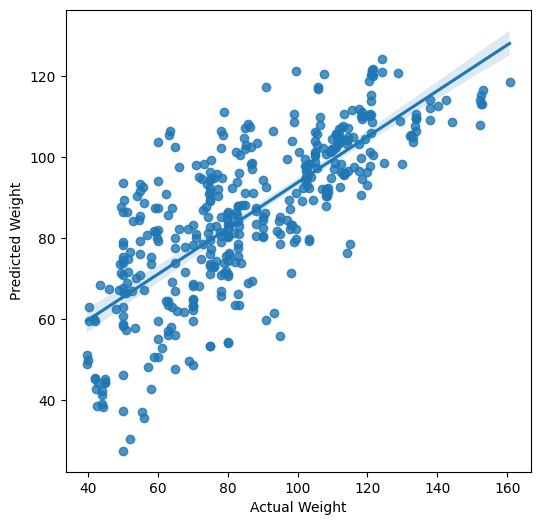

In [54]:
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

Text(0, 0.5, 'Error')

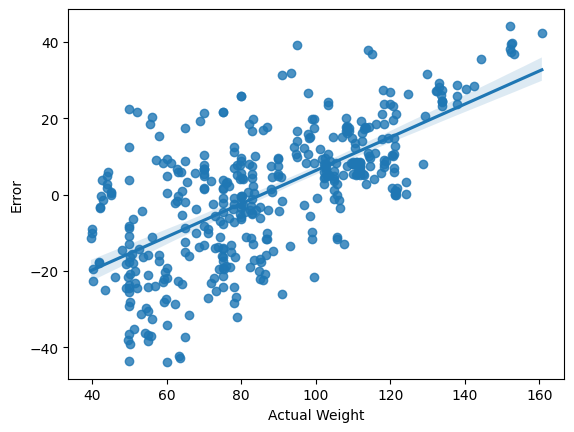

In [55]:
error = y_test - y_pred_lr
sns.regplot(x = y_test,  y= error)
plt.xlabel("Actual Weight")
plt.ylabel("Error")

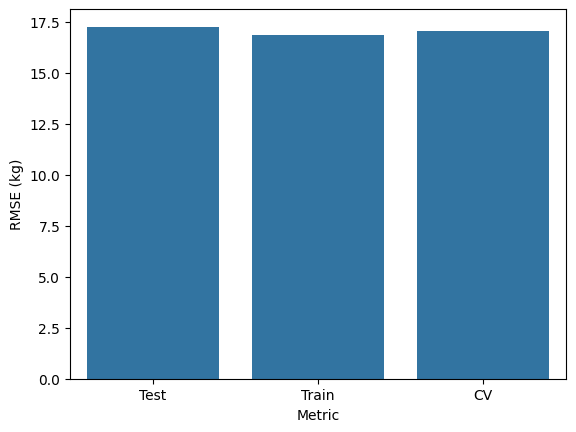

In [56]:
error_plot= []
error_plot = pd.DataFrame({
    'Metric': ['Test', 'Train', 'CV'],
    'RMSE'  : [lr_rmse, train_rmse, cv_rmse]
})

sns.barplot(data=error_plot, x='Metric', y='RMSE')
plt.ylabel('RMSE (kg)')
plt.show()

## 2.3 SGD Regressor

In [57]:
cv = GridSearchCV(SGDRegressor(random_state=42), {"loss":['squared_error', 'huber'], "penalty" : ["l2", "l1", "elasticnet"],  "alpha":[1e-4, 1e-2], "l1_ratio": [0.15, 0.3, 0.5] , "learning_rate": ['optimal'], "max_iter": [500, 1000]},
                 cv = 5, verbose = 1, n_jobs = -1 ) #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
cv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01], 'l1_ratio': [0.15, 0.3, 0.5],
                         'learning_rate': ['optimal'],
                         'loss': ['squared_error', 'huber'],
                         'max_iter': [500, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=1)

In [58]:
cv.best_params_

{'alpha': 0.0001,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'max_iter': 500,
 'penalty': 'l2'}

In [59]:
sgd = SGDRegressor(random_state=42, loss = "huber", penalty = "l2", alpha=0.0001, l1_ratio=0.15,learning_rate = "optimal" ,max_iter = 500 ,fit_intercept=True, shuffle = True) #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)


sgd_r2 = r2_score(y_test, y_pred_sgd)
sgd_mse = mean_squared_error(y_test, y_pred_sgd)
sgd_rmse = np.sqrt(sgd_mse)
sgd_mae = mean_absolute_error(y_test, y_pred_sgd)

if not any(d.get('model') == 'Stohastic Descent' for d in model_map):
    model_map.append({"model":"Stohastic Descent", "r2":sgd_r2, "mse": sgd_mse, "rmse": sgd_rmse, "mae": sgd_mae})

print(f'R^2: {sgd_r2:.3f}')
print(f'MSE: {sgd_mse:.3f}')
print(f'RMSE: {sgd_rmse:.3f}')
print(f'MAE: {sgd_mae:.3f}')

R^2: 0.580
MSE: 295.842
RMSE: 17.200
MAE: 13.334


In [60]:
train_rmse_sgd = np.sqrt(mean_squared_error(
                 y_train , sgd.predict(X_train)))
print("Train RMSE:", train_rmse)

Train RMSE: 16.865860236830912


In [61]:
kfold_sgd = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_sgd = cross_val_score(sgd, X_train, y_train,
                            cv=kfold,
                            scoring='neg_root_mean_squared_error')
val_rmse_sgd = -cv_scores_sgd.mean()
print("5 KFold score:", cv_rmse)

5 KFold score: 17.061247413998338


Text(0, 0.5, 'Predicted Weight')

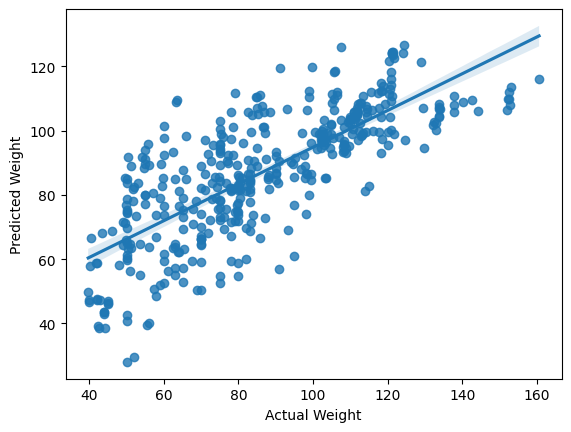

In [62]:
sns.regplot(x=y_test, y=y_pred_sgd)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

Text(0, 0.5, 'Error')

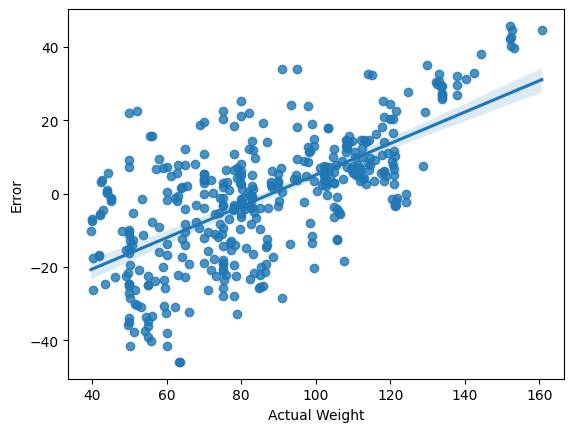

In [63]:
error = y_test - y_pred_sgd
sns.regplot(x = y_test,  y= error)
plt.xlabel("Actual Weight")
plt.ylabel("Error")

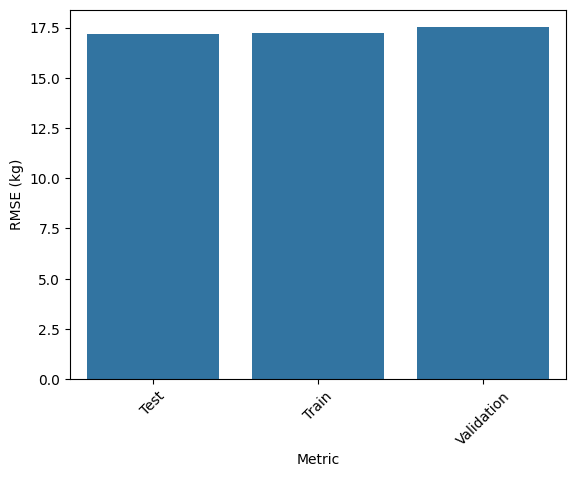

In [64]:
error_plot= []
error_plot = pd.DataFrame({
    'Metric': ['Test', 'Train', 'Validation'],
    'RMSE'  : [sgd_rmse, train_rmse_sgd, val_rmse_sgd]
})

sns.barplot(data=error_plot, x='Metric', y='RMSE')
plt.xticks(rotation=45)
plt.ylabel('RMSE (kg)')
plt.show()

Based on the above metrics, both Linear Regression and Stochastic Gradient Descent underfit, as they produce high errors, and the Training, Test, and Validation error values are also high. It appears that they are unable to capture the non-linearities between lifestyle and weight factors. We can see it form the following diagram.

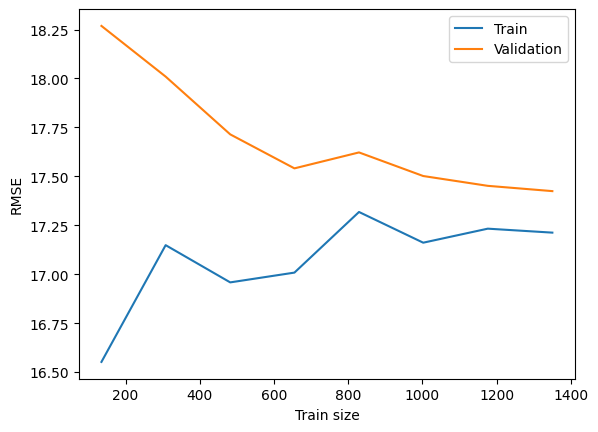

In [65]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    sgd, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=-1, shuffle=True, random_state=42)

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validation')
plt.ylabel('RMSE'); plt.xlabel('Train size'); plt.legend();

RMSE for the validation falls as the train size increases, however the error is still very high, which is a clear indicatior of underfitting

## 2.4 Decision Tree Regression

Initiate a search to find the most suitable parameter based on the training set

In [66]:
reg_cv = GridSearchCV(DecisionTreeRegressor(), {"criterion":["squared_error"], "max_depth": [14,16,18], "min_samples_leaf": [2,4,6,8,10], "min_samples_split": [2,4,6,8,10]}, scoring='neg_mean_squared_error', cv =10, verbose=1, refit= True ,n_jobs=-1)
reg_cv.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [14, 16, 18],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
reg_cv.best_params_ #//Mono me Manhattan paizei kala

{'criterion': 'squared_error',
 'max_depth': 18,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [68]:
dtree = DecisionTreeRegressor(random_state=42, criterion= "squared_error", max_depth= 16, min_samples_leaf= 4, min_samples_split= 6)
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

dtree_r2 = r2_score(y_test, y_pred_dtree)
dtree_mse = mean_squared_error(y_test, y_pred_dtree)
dtree_rmse = np.sqrt(dtree_mse)
dtree_mae = mean_absolute_error(y_test, y_pred_dtree)

if not any(d.get('model') == 'Decision Tree' for d in model_map):
    model_map.append({"model":"Desicion Tree", "r2":dtree_r2, "mse": dtree_mse, "rmse": dtree_rmse, "mae": dtree_mae})


print(f'R^2: {dtree_r2:.3f}')
print(f'MSE: {dtree_mse:.3f}')
print(f'RMSE: {dtree_rmse:.3f}')
print(f'MAE: {dtree_mae:.3f}')

R^2: 0.839
MSE: 113.508
RMSE: 10.654
MAE: 6.027


Train Set RMSE

In [69]:
train_rmse_dtree = np.sqrt(mean_squared_error(
                 y_train , dtree.predict(X_train)))
print("Train RMSE:", train_rmse)

Train RMSE: 16.865860236830912


KFlod Validation Set RMSE

In [70]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dtree = cross_val_score(dtree, X_train, y_train,
                            cv=kfold,
                            scoring='neg_root_mean_squared_error')
val_rmse_dtree = -cv_scores_dtree.mean()
print("5 KFold score:", val_rmse_dtree)

5 KFold score: 11.757721606505587


Text(0, 0.5, 'Predicted Weight')

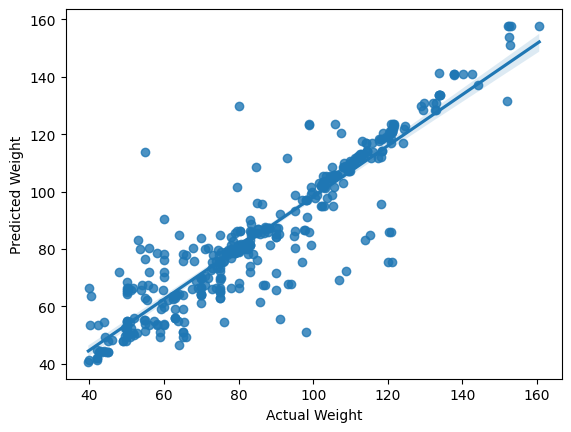

In [71]:
sns.regplot(x = y_test, y = y_pred_dtree)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

Text(0, 0.5, 'Error')

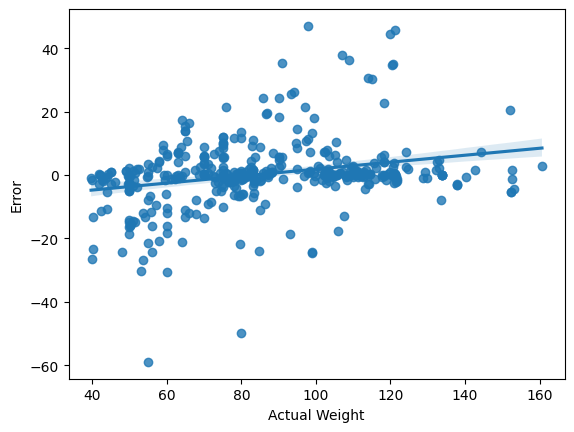

In [72]:
error = y_test - y_pred_dtree
sns.regplot(x = y_test,  y= error)
plt.xlabel("Actual Weight")
plt.ylabel("Error")

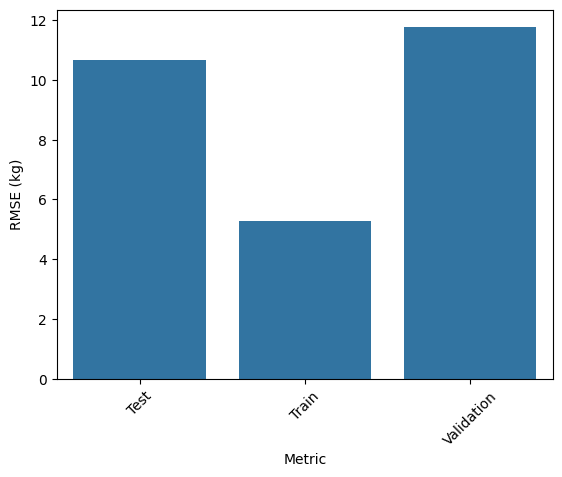

In [73]:
error_plot= []
error_plot = pd.DataFrame({
    'Metric': ['Test', 'Train', 'Validation'],
    'RMSE'  : [dtree_rmse, train_rmse_dtree, val_rmse_dtree]
})

sns.barplot(data=error_plot, x='Metric', y='RMSE')
plt.xticks(rotation=45)
plt.ylabel('RMSE (kg)')
plt.show()

The Decisions tree overfits through our test and

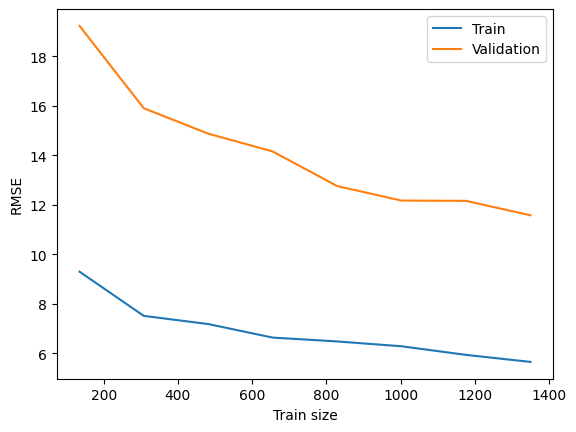

In [74]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    dtree, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=-1, shuffle=True, random_state=42)

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validation')
plt.ylabel('RMSE'); plt.xlabel('Train size'); plt.legend();

In the decision tree we see an improvemnet on the R2 score, however the Root Mean Squared error, is still high both the Validation and Test sets, and on the training set, it is significantly lower, meaing that the model tends to need more data in order not to overfit (reudce variance) and generalize better on new data

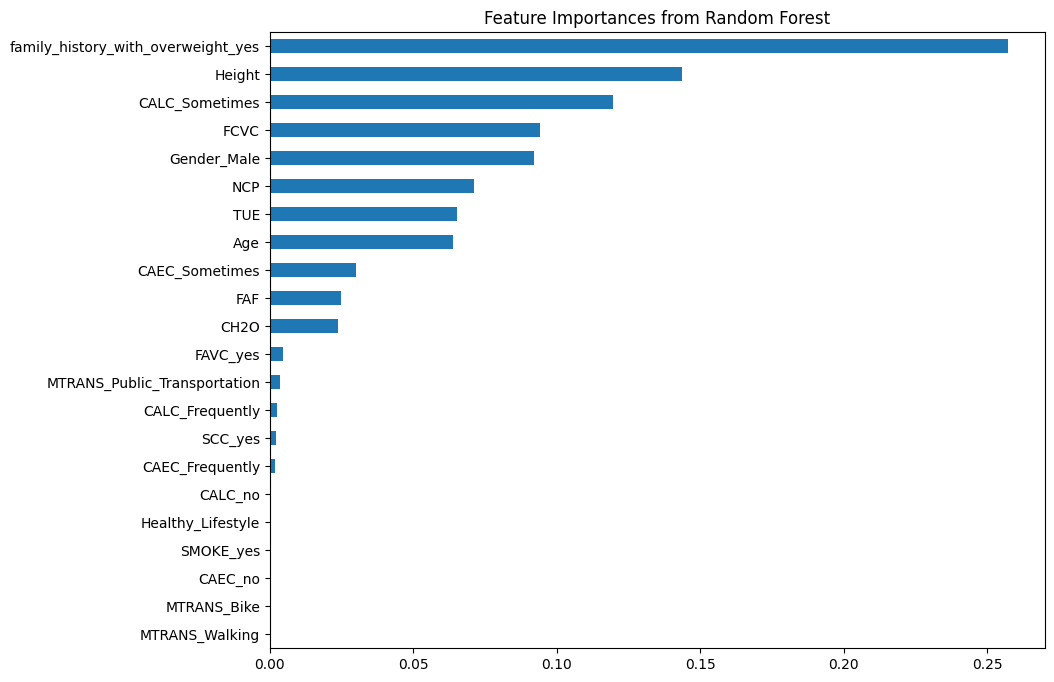

In [75]:
importances = pd.Series(dtree.feature_importances_, index=X_train.columns)

# Sort and plot
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.show()

##2.5 Random Forest Regression

Grid Search CV to finf the optimal a set of the given Hyper Parameters (Takes some time)

In [76]:
reg_cv = GridSearchCV(RandomForestRegressor(), {"n_estimators":[100,200], "criterion":["squared_error"], "max_depth": [10,12,14], "min_samples_leaf": [2,4,6], "min_samples_split": [4,6,8]}, scoring='neg_mean_squared_error', cv =5, verbose=1, n_jobs=-1)
reg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 12, 14],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [77]:
reg_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

With

In [78]:
rForest = RandomForestRegressor(n_estimators= 100, criterion= "squared_error", max_depth= 14, min_samples_leaf= 2, min_samples_split= 4)

rForest.fit(X_train, y_train)

y_pred_forest = rForest.predict(X_test)

rforest_r2 = r2_score(y_test, y_pred_forest)
rforest_mse = mean_squared_error(y_test, y_pred_forest)
rforest_rmse = np.sqrt(rforest_mse)
rforest_mae = mean_absolute_error(y_test, y_pred_forest)

if not any(d.get('model') == 'Random Forest' for d in model_map):
    model_map.append({"model":"Random Forest", "r2":rforest_r2, "mse": rforest_mse, "rmse": rforest_rmse, "mae": rforest_mae})


print(f'R^2: {rforest_r2:.3f}')
print(f'MSE: {rforest_mse:.3f}')
print(f'RMSE: {rforest_rmse:.3f}')
print(f'MAE: {rforest_mae:.3f}')

R^2: 0.898
MSE: 71.685
RMSE: 8.467
MAE: 5.320


Train Set RMSE

In [79]:
train_rmse_rf = np.sqrt(mean_squared_error(
                 y_train , rForest.predict(X_train)))
print("Train RMSE:", train_rmse)

Train RMSE: 16.865860236830912


KFold cross validation

In [80]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_forest = cross_val_score(rForest, X_train, y_train,
                            cv=kfold,
                            scoring='neg_root_mean_squared_error')
val_rmse_rf = -cv_scores_forest.mean()
print("5 KFold score:", cv_rmse)

5 KFold score: 17.061247413998338


Predicted Weight Value and Error

Text(0, 0.5, 'Predicted Weight')

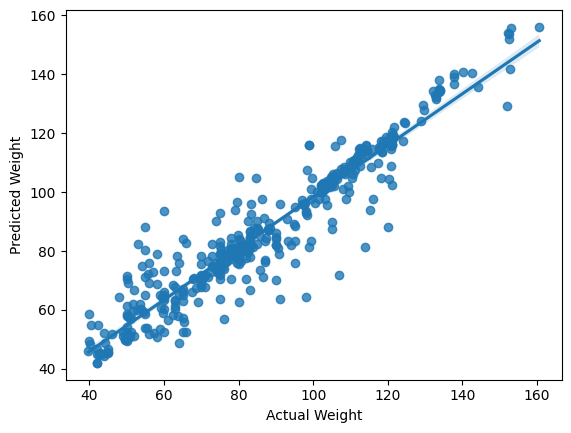

In [81]:
sns.regplot(x=y_test, y=y_pred_forest)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

Text(0, 0.5, 'Error')

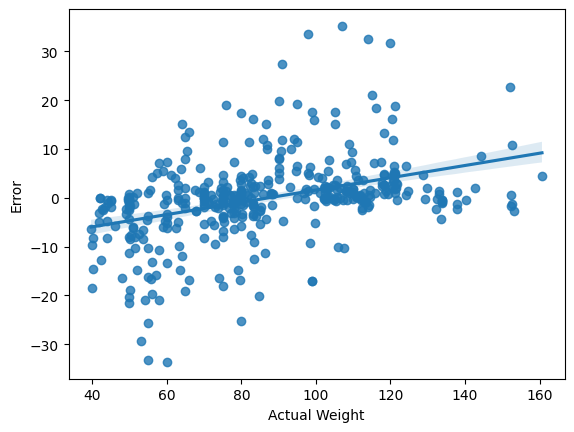

In [82]:
error = y_test - y_pred_forest
sns.regplot(x = y_test,  y= error)
plt.xlabel("Actual Weight")
plt.ylabel("Error")

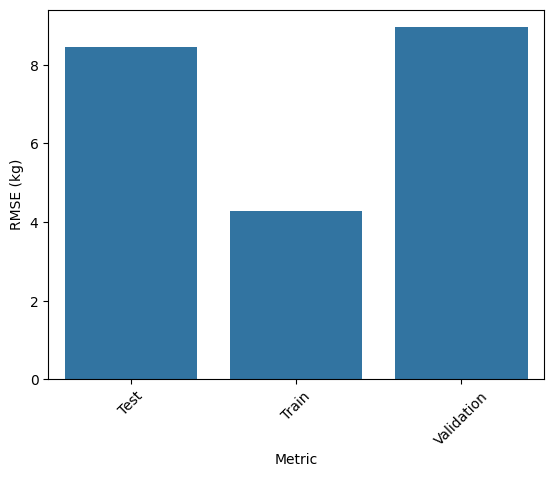

In [83]:
error_plot= []
error_plot = pd.DataFrame({
    'Metric': ['Test', 'Train', 'Validation'],
    'RMSE'  : [rforest_rmse, train_rmse_rf, val_rmse_rf ]
})

sns.barplot(data=error_plot, x='Metric', y='RMSE')
plt.xticks(rotation=45)
plt.ylabel('RMSE (kg)')
plt.show()

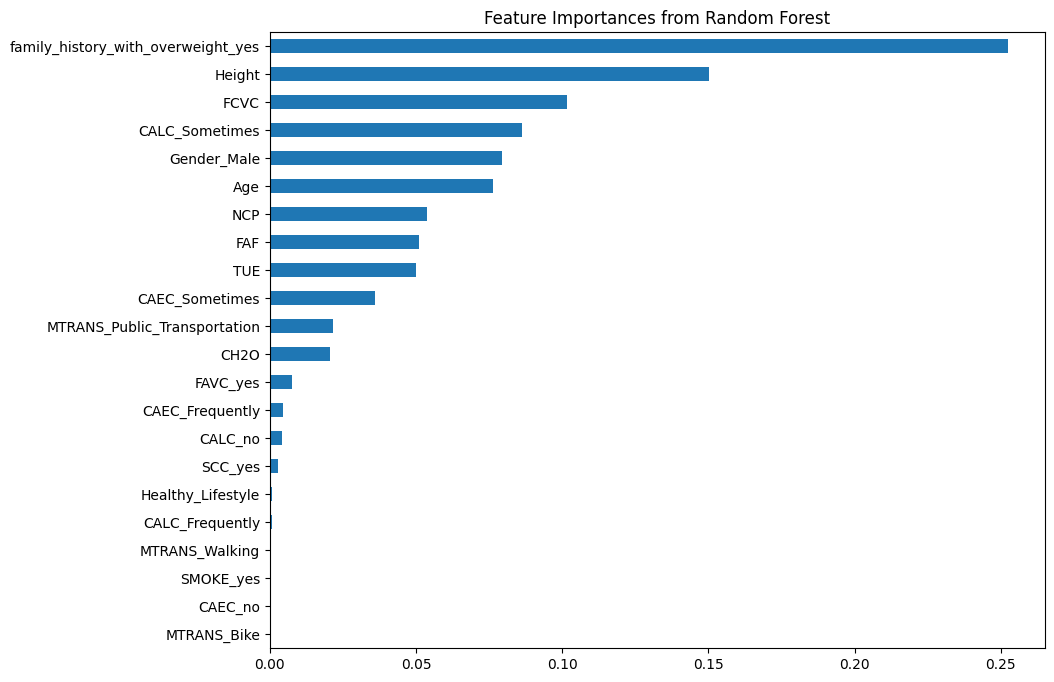

In [84]:
importances = pd.Series(rForest.feature_importances_, index=X_train.columns)

# Sort and plot
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.show()

## 2.6 KN Neighbors

In [85]:
reg_cv = GridSearchCV(KNeighborsRegressor(), {"n_neighbors":[2,4,6,8,10,12], "weights":['uniform', 'distance'],"leaf_size":[25,30,35, 40] ,"p": [1,2]}, scoring='neg_mean_squared_error', cv =10, verbose=1, n_jobs = -1)
reg_cv.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [2, 4, 6, 8, 10, 12], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [86]:
reg_cv.best_params_

{'leaf_size': 25, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [87]:
knn = KNeighborsRegressor(n_neighbors=2, weights = 'distance', leaf_size= 25 ,metric='manhattan', algorithm = 'auto')

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("Accuracy Score:")
knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, y_pred_knn)

if not any(d.get('model') == 'KNN' for d in model_map):
    model_map.append({"model":"KNN", "r2":knn_r2, "mse": knn_mse, "rmse": knn_rmse, "mae": knn_mae})

print(f'R^2: {knn_r2:.3f}')
print(f'MSE: {knn_mse:.3f}')
print(f'RMSE: {knn_rmse:.3f}')
print(f'MAE: {knn_mae:.3f}')


Accuracy Score:
R^2: 0.889
MSE: 78.352
RMSE: 8.852
MAE: 4.276


In [88]:
model_map

[{'model': 'Linear Regression',
  'r2': 0.5773153631995891,
  'mse': 298.0395585382613,
  'rmse': np.float64(17.26382224590665),
  'mae': 13.839543357851202},
 {'model': 'Stohastic Descent',
  'r2': 0.5804326725518402,
  'mse': 295.84150963304216,
  'rmse': np.float64(17.200043884625472),
  'mae': 13.333821896410216},
 {'model': 'Desicion Tree',
  'r2': 0.8390215612222759,
  'mse': 113.50765712865572,
  'rmse': np.float64(10.653997237124464),
  'mae': 6.026877187955254},
 {'model': 'Random Forest',
  'r2': 0.8983352156733676,
  'mse': 71.68495091035116,
  'rmse': np.float64(8.466696576017778),
  'mae': 5.31963198439313},
 {'model': 'KNN',
  'r2': 0.8888793022093907,
  'mse': 78.35241887349467,
  'rmse': np.float64(8.851690170441726),
  'mae': 4.276121758489934}]

In [89]:
train_rmse_knn = np.sqrt(mean_squared_error(
                 y_train , knn.predict(X_train)))
print("Train RMSE:", train_rmse_knn)

Train RMSE: 0.0


With above we confirm that 100% the KN Neighbors models overfits, since it memrorizes the training dataset

In [90]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42) # used chatgpt to see the scorinng we need 05/07/2025
cv_scores_knn = cross_val_score(knn, X_train, y_train,
                            cv=kfold,
                            scoring='neg_root_mean_squared_error')
val_rmse_knn = -cv_scores_knn.mean()
print("5 KFold score:", cv_rmse)

5 KFold score: 17.061247413998338


The KNN model still overfits and also shows an error on 8.8 Kgs of weight in the test data and 10 Kg on the validation data

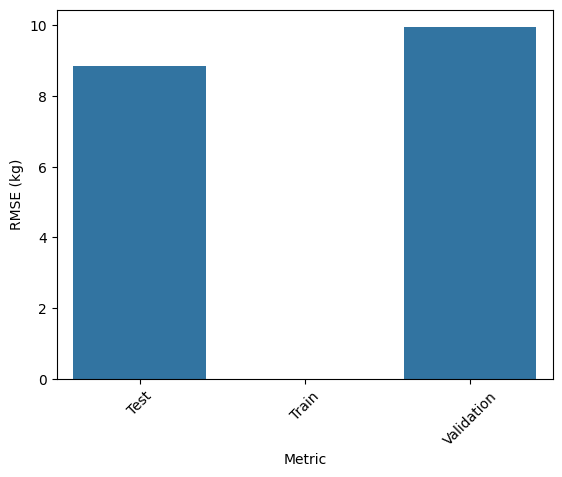

In [91]:
error_plot= []
error_plot = pd.DataFrame({
    'Metric': ['Test', 'Train', 'Validation'],
    'RMSE'  : [knn_rmse, train_rmse_knn, val_rmse_knn ]
})

sns.barplot(data=error_plot, x='Metric', y='RMSE')
plt.xticks(rotation=45)
plt.ylabel('RMSE (kg)')
plt.show()

In [92]:
#Created with the Use of Chatgpt on 5/72025 to see the improtances of the features
from sklearn.inspection import permutation_importance

result = permutation_importance(
    knn,
    X_test, y_test,
    n_repeats = 20,
    random_state = 42,
    n_jobs = -1
)

importances = pd.Series(result.importances_mean,
                        index = X_test.columns)
print(importances.sort_values())

CALC_no                              -0.001908
SMOKE_yes                            -0.000018
MTRANS_Bike                           0.000031
CAEC_no                               0.000427
CALC_Sometimes                        0.000604
MTRANS_Walking                        0.000679
SCC_yes                               0.001359
CALC_Frequently                       0.003142
Healthy_Lifestyle                     0.012730
FAVC_yes                              0.017454
MTRANS_Public_Transportation          0.023480
CAEC_Frequently                       0.030821
CAEC_Sometimes                        0.034471
FAF                                   0.053449
TUE                                   0.062450
CH2O                                  0.070160
family_history_with_overweight_yes    0.086895
NCP                                   0.094092
Age                                   0.098613
Gender_Male                           0.110903
FCVC                                  0.137354
Height       

Weight Value Accuracy and Error

Text(0, 0.5, 'Predicted Weight')

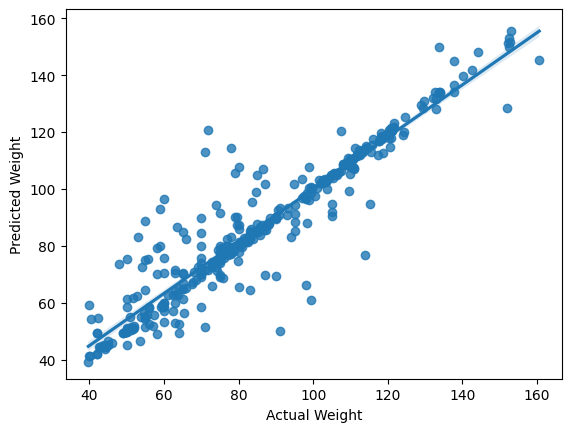

In [93]:
sns.regplot(x=y_test, y=y_pred_knn)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

Text(0, 0.5, 'Error')

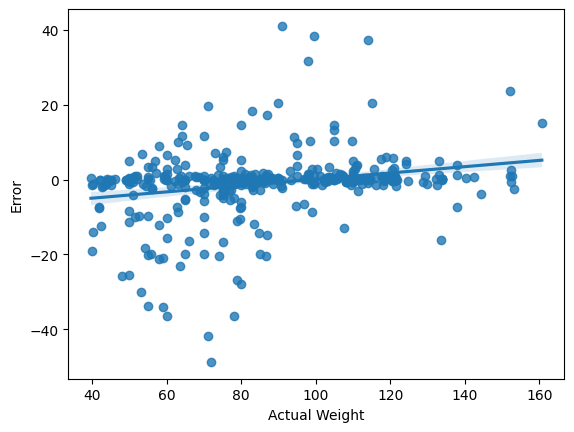

In [94]:
error = y_test - y_pred_knn
sns.regplot(x = y_test,  y= error)
plt.xlabel("Actual Weight")
plt.ylabel("Error")

## 2.7 XG Boost

In [95]:
import xgboost as xgb
from xgboost import XGBRegressor

In [96]:
reg_cv = GridSearchCV(XGBRegressor(), {"colsample_bytree":[0.8,1.0],"min_child_weight":[1.0,1.2],'max_depth': [2,3,4], 'n_estimators': [100, 200], "eta":[0.05, 0.1], "subsample": [0.7, 0.8]}, scoring='neg_mean_squared_error', cv =5, verbose=1, n_jobs=-1) #https://www.kaggle.com/code/kenji19840210/basic-prediction-with-xgboost-xgbregressor retireved 04/07/2025
reg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'eta': [0.05, 0.1],
                         'max_depth': [2, 3, 4], 'min_child_weight': [1.0, 1.2],
                         'n_estimators': [100, 200], 'subsample': [0.7, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [97]:
reg_cv.best_params_

{'colsample_bytree': 1.0,
 'eta': 0.1,
 'max_depth': 4,
 'min_child_weight': 1.2,
 'n_estimators': 200,
 'subsample': 0.7}

In [98]:
xgbm = XGBRegressor(n_estimators=200,  min_child_weight =1.2 , max_depth=4, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbm.fit(X_train, y_train)

y_pred_xgb = xgbm.predict(X_test)

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

if not any(d.get('model') == 'XGBoost' for d in model_map):
    model_map.append({"model":"XGBoost", "r2":knn_r2, "mse": knn_mse, "rmse": knn_rmse, "mae": knn_mae})

print("Accuracy Test Score:")
print(f'R^2: {xgb_r2:.3f}')
print(f'MSE: {xgb_mse:.3f}')
print(f'RMSE: {xgb_rmse:.3f}')
print(f'MAE: {xgb_mae:.3f}')

Accuracy Test Score:
R^2: 0.885
MSE: 80.883
RMSE: 8.993
MAE: 6.364


Predicted Weight Value and Error

Text(0, 0.5, 'Predicted Weight')

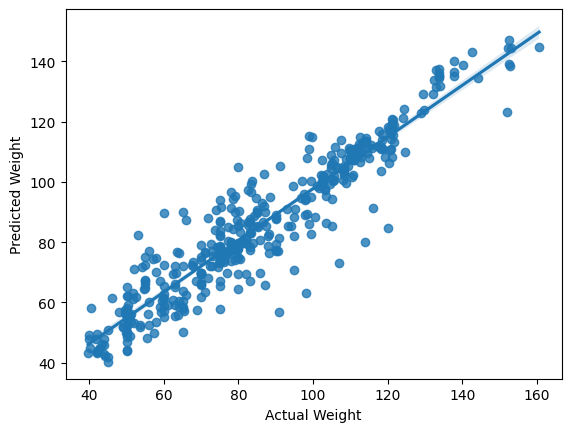

In [99]:
sns.regplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

Text(0, 0.5, 'Error')

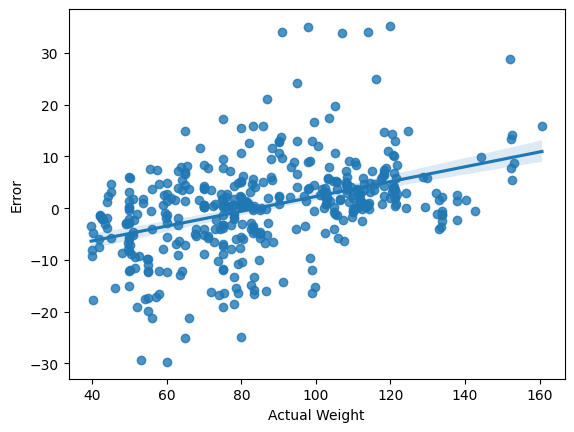

In [100]:
error = y_test - y_pred_xgb
sns.regplot(x = y_test,  y= error)
plt.xlabel("Actual Weight")
plt.ylabel("Error")

In [101]:
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, xgbm.predict(X_train)))
print("Train RMSE:", train_rmse_xgb)

Train RMSE: 5.2297293217238545


In [102]:
kfold = KFold(n_splits=15, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(xgbm, X_train, y_train,
                            cv=kfold,
                            scoring='neg_root_mean_squared_error')
val_rmse_xgb = -cv_scores_xgb.mean()
print("5 KFold score:", cv_rmse)

5 KFold score: 17.061247413998338


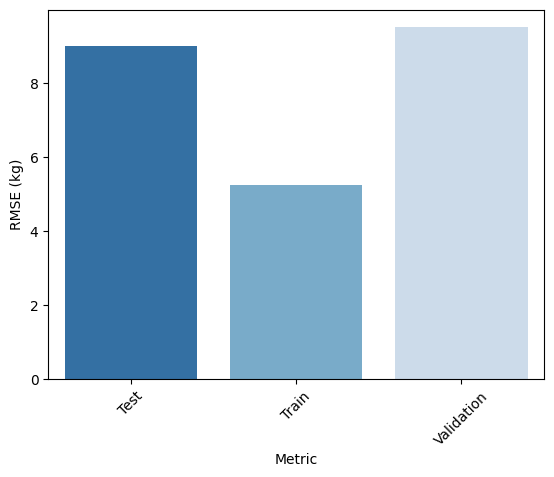

In [103]:
error_plot= []
error_plot = pd.DataFrame({
    'Metric': ['Test', 'Train', 'Validation'],
    'RMSE'  : [xgb_rmse, train_rmse_xgb, val_rmse_xgb ]
})

sns.barplot(data=error_plot, x='Metric', y='RMSE', palette='Blues_r')
plt.xticks(rotation=45)
plt.ylabel('RMSE (kg)')
plt.show()

## 2.8 Summarizing all regressions

In [104]:
model_map

[{'model': 'Linear Regression',
  'r2': 0.5773153631995891,
  'mse': 298.0395585382613,
  'rmse': np.float64(17.26382224590665),
  'mae': 13.839543357851202},
 {'model': 'Stohastic Descent',
  'r2': 0.5804326725518402,
  'mse': 295.84150963304216,
  'rmse': np.float64(17.200043884625472),
  'mae': 13.333821896410216},
 {'model': 'Desicion Tree',
  'r2': 0.8390215612222759,
  'mse': 113.50765712865572,
  'rmse': np.float64(10.653997237124464),
  'mae': 6.026877187955254},
 {'model': 'Random Forest',
  'r2': 0.8983352156733676,
  'mse': 71.68495091035116,
  'rmse': np.float64(8.466696576017778),
  'mae': 5.31963198439313},
 {'model': 'KNN',
  'r2': 0.8888793022093907,
  'mse': 78.35241887349467,
  'rmse': np.float64(8.851690170441726),
  'mae': 4.276121758489934},
 {'model': 'XGBoost',
  'r2': 0.8888793022093907,
  'mse': 78.35241887349467,
  'rmse': np.float64(8.851690170441726),
  'mae': 4.276121758489934}]

In [105]:
model_results = pd.DataFrame(model_map)
model_results.sort_values(by='rmse')

,model,r2,mse,rmse,mae
3,Random Forest,0.898335,71.684951,8.466697,5.319632
4,KNN,0.888879,78.352419,8.851690,4.276122
5,XGBoost,0.888879,78.352419,8.851690,4.276122
2,Desicion Tree,0.839022,113.507657,10.653997,6.026877
1,Stohastic Descent,0.580433,295.841510,17.200044,13.333822
0,Linear Regression,0.577315,298.039559,17.263822,13.839543


It appears that Random Forest and XGBoost both overfit but at the same time showless RMSE error. We will use this model as a baseline to run the classification model. We will also have to see which are the most important features that contribute the most to the weight predictions, which are highly correlated with obesity and BMI. Height is also a factor in obesity; we can predict it using some data leakage with the BMI. However, this is not the point of this regression.

Below we are seeing the most important features that predicted the weight

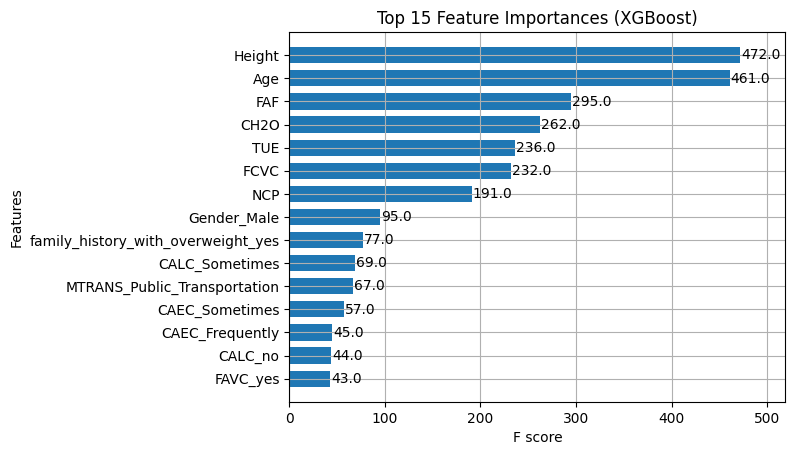

In [106]:
xgb.plot_importance(xgbm, height=0.7, max_num_features=15)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

Height, age, physical activity ration (FAF), water consumption (CH2O), electronic device usage (TUE), vegetable consumption (FCVC), and number of meals are the most significant factors contributing to weight prediction.
Less contributing factors are eating food between meals (CAEC) and high caloric food consumption (FAVC).

# 3. Classification

## 3.1 Preprocessing

In [107]:
from sklearn.compose import ColumnTransformer #https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
from sklearn.pipeline import Pipeline # This is mose easy that one I did before https://scikit-learn.org/stable/api/sklearn.pipeline.html
from xgboost import XGBClassifier #https://xgboost.readthedocs.io/en/latest/python/python_api.html
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ["Height", 'FAF', 'CH2O', 'TUE', 'FCVC', 'NCP', 'Healthy_Lifestyle']

l = LabelEncoder()
X = data_new[categorical_cols + numerical_cols]
y = l.fit_transform(data_new['NObeyesdad'])
l.fit_transform(data_new['NObeyesdad'])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=42)

preprocessing = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])


##3.2 XG Boost Classifier

Pipeline to fit the set and explore hyperparameters

In [108]:
pipe = Pipeline([ ("prep", preprocessing), ("xgb", XGBClassifier(objective='multi:softprob', n_estimators=400, eval_metric='mlogloss', # initiate the pipe for KFold/have the same data for Hyperparameter tuning
learning_rate=0.05, max_depth = 5, grow_policy = "depthwise",sampling_method ="uniform", min_child_weight = 1, n_jobs=-1))])

val= KFold(10, shuffle=True, random_state=42)
balanced_score = cross_val_score(
    pipe, X_train, y_train, cv=val,
    scoring='balanced_accuracy', n_jobs=-1).mean()
print(f"10-fold CV balanced-accuracy: {balanced_score:.3f}")

10-fold CV balanced-accuracy: 0.813


Test Hyperparameters

In [109]:
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__n_estimators': [100,200,400],
    'xgb__grow_policy': ['depthwise'],
}

grid = GridSearchCV(pipe, param_grid,
                    scoring='balanced_accuracy',
                    cv=10,
                    n_jobs=-1,
                    verbose=1)

grid.fit(X_train, y_train)

print("Best balanced-accuracy:", grid.best_score_)
print("Best hyperparameters:")
print(grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best balanced-accuracy: 0.8211351001750444
Best hyperparameters:
{'xgb__grow_policy': 'depthwise', 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__n_estimators': 400}


Classification Report

In [110]:
from sklearn.metrics import classification_report

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        54
           1       0.65      0.72      0.68        58
           2       0.77      0.79      0.78        70
           3       0.92      0.93      0.93        60
           4       0.98      0.98      0.98        65
           5       0.75      0.72      0.74        58
           6       0.75      0.76      0.75        58

    accuracy                           0.83       423
   macro avg       0.83      0.82      0.83       423
weighted avg       0.83      0.83      0.83       423



In [111]:
from sklearn.metrics import balanced_accuracy_score
pipe.fit(X_train, y_train)
train_balacc = balanced_accuracy_score(y_train, pipe.predict(X_train))
print(f"Train balanced-accuracy: {train_balacc:.3f}")

Train balanced-accuracy: 0.998


Confusion Matrix

<Figure size 2000x2000 with 0 Axes>

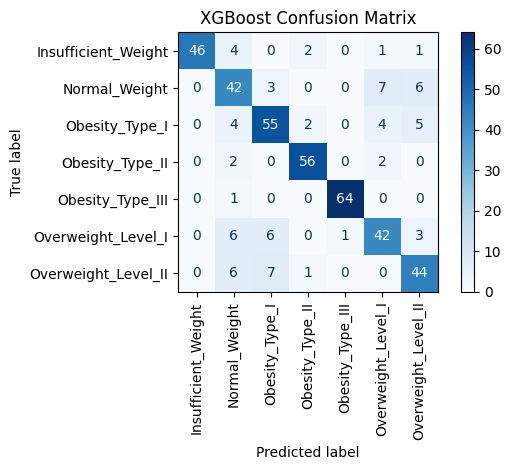

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = pipe.predict(X_test)

# Display confusion matrix (normalized to percentages)
plt.figure(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=l.classes_,
    cmap='Blues',

)
plt.title("XGBoost Confusion Matrix")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In the above Confusion Matrix, we can see the the 7 records of Overweight Level I are classifed as Normal Weight, and 6 Normal Weight persons have been classified as Overweight Level I. This happens because earlier we saw that overweight Level I has some outliers both upward and downwards. In order to Remedy this situation we need to remove the outliers from our sample

Also regarding the results which are wrong by far, e.g. Overweight Level II ,classifed as Normal Weight. In the the XBRegressor, we saw that the model apart from overfiting, also produces the big amount of weight error aprrox 9 Kg, thus since Height is included in our features, the weight error can cause b

The model clearly overfits since we reach almost 100% accuracy in the training set while on the test set we rach almos 83% accuracy.

One way to decrease overfitting apart from the hyperparameter tuning is to remove some feature, therefore we will try to increase the bias to lower the variance. We will keep only the top 15 feature contributethe most to each Classifier, and will test them accordingly to see if we have better results

Load top 15 Features

In [113]:
feature_names = pipe.named_steps['prep'].get_feature_names_out()
booster = pipe.named_steps['xgb'].get_booster()
gain_dict = booster.get_score(importance_type='gain')

importances = pd.Series(
    [gain_dict.get(f'f{i}', 0.0) for i in range(len(feature_names))],
    index = feature_names
).sort_values(ascending=False)

print("\nTop features 15 by 'gain':")
print(importances.head(15))


Top features 20 by 'gain':
cat__Gender_Male                           4.568027
cat__CAEC_Frequently                       3.485148
num__FCVC                                  2.904074
cat__family_history_with_overweight_yes    2.851334
cat__CAEC_no                               2.838711
cat__CAEC_Sometimes                        2.601012
num__TUE                                   1.554532
num__NCP                                   1.523201
cat__FAVC_yes                              1.433623
cat__SCC_yes                               1.387076
cat__CALC_Sometimes                        1.344560
num__CH2O                                  1.209649
cat__CALC_no                               1.097177
num__FAF                                   1.060600
cat__MTRANS_Walking                        1.034266
dtype: float64


## 3.3 Top Feature selection

We count the top 15 significant features

In [114]:
count = 15
top_feats = importances.head(count).index.tolist()

In [115]:
top_cat = { raw for raw in categorical_cols
             if any(f"cat__{raw}_" in feat for feat in top_feats) } #Ksekinaei me cat__

top_num = { raw for raw in numerical_cols
             if f"num__{raw}" in top_feats } # Ksekinaei me num__

preproc_opt = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), list(top_cat)),
    ('num', StandardScaler(), list(top_num))
])

We drop the first column as before to reduce compexity... The row with all zero's will represent this feature, that we droped it's column

In [116]:
pipe_top = Pipeline([ ("prep", preproc_opt), ("xgb", XGBClassifier(objective='multi:softprob', n_estimators=400, eval_metric='mlogloss', # initiate the pipe for KFold/have the same data for Hyperparameter tuning
learning_rate=0.05, max_depth = 5, grow_policy = "depthwise",sampling_method ="uniform", min_child_weight = 1, n_jobs=-1))])

val_opt = KFold(10, shuffle=True, random_state=42)
balanced_score_opt = cross_val_score(
    pipe_top, X_train, y_train, cv=val,
    scoring='balanced_accuracy', n_jobs=-1).mean()
print(f"10-fold CV balanced-accuracy: {balanced_score:.3f}")

10-fold CV balanced-accuracy: 0.813


Created a new piepline for the optimized features for the algorithm

In [117]:
from sklearn.metrics import classification_report

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        54
           1       0.65      0.72      0.68        58
           2       0.77      0.79      0.78        70
           3       0.92      0.93      0.93        60
           4       0.98      0.98      0.98        65
           5       0.75      0.72      0.74        58
           6       0.75      0.76      0.75        58

    accuracy                           0.83       423
   macro avg       0.83      0.82      0.83       423
weighted avg       0.83      0.83      0.83       423



The classification report shows that the model performs adequately in terms of accuracy across the 7 weight classes.

Precision, which measures how many of the cases predicted for a class are actually correct, is close to 98% for several groups—for example, the classifier labelled the “Obesity I” samples correctly 65/66 times (~98% accuracy).

Recall tells us how many real instances of each class were found; for the “Normal Weight” category the model retrieved about 78 percent of true cases, meaning it missed roughly one in five. Because the F1-score is the harmonic mean of precision and recall, it balances the two: the “Overweight I” class, for instance, posts a healthy F1 of 0.82, coming from a precision of 0.84 and recall of 0.80. Looking across all classes, the model attains an overall accuracy of 0.84—so it classifies 84 percent of the 423 test samples correctly.

The macro-average (an unweighted mean across classes) yields precision 0.85, recall 0.84, and F1 0.84, indicating that, on average, each class is handled reasonably well. The weighted average, which factors in class sizes, is mostly identical (0.85 / 0.84 / 0.84) since the class distribution, as we saw earlier, is fairly balanced.


Concluding, while “Normal Weight” and the most severe obesity classes can be improved by adding features, the model is generally accurate and particularly strong at identifying the moderate-to-high obesity categories. Please note that the only physical metric that we have included is the height; BMI was not included since it would be very easy to predict the obesity class, and the aim here is to use only the habits of each person.

In [118]:
from sklearn.metrics import balanced_accuracy_score
pipe_top.fit(X_train, y_train)
train_balacc = balanced_accuracy_score(y_train, pipe_top.predict(X_train))
print(f"Train balanced-accuracy: {train_balacc:.3f}")

Train balanced-accuracy: 0.980


Confusion Matrix

<Figure size 2000x2000 with 0 Axes>

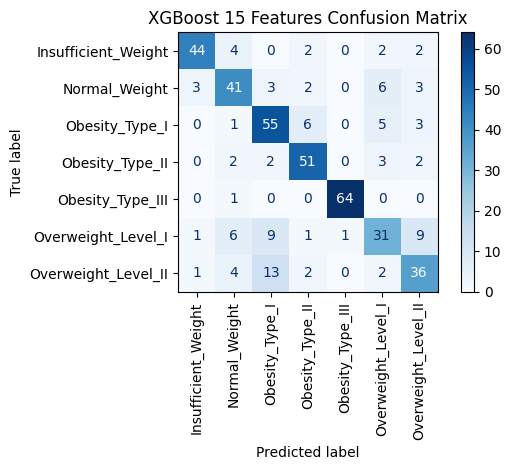

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = pipe_top.predict(X_test)
plt.figure(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=l.classes_,
    cmap='Blues',

)
plt.title("XGBoost 15 Features Confusion Matrix")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3.4 Random Forest Classsifier

Now that we ahve reduced our dataser's features, we will try another algortihm. It may not perform very well because it may be sensitive on different features.

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('prep', preproc_opt),
    ('rf',  RandomForestClassifier(random_state=42, min_samples_leaf = 1 , n_estimators=300, max_depth=20,class_weight='balanced',max_features = 'sqrt',n_jobs=-1))
])


val= KFold(10, shuffle=True, random_state=42)
balanced_score = cross_val_score(
    pipe, X_train, y_train, cv=val,
    scoring='balanced_accuracy', n_jobs=-1).mean()
print(f"10-fold CV balanced-accuracy: {balanced_score:.3f}")

10-fold CV balanced-accuracy: 0.813


Classifier Parameter Tuning

In [121]:

param_grid = {
    'rf__n_estimators'     : [300, 500],
    'rf__max_depth'        : [5, 10, 20],
    'rf__min_samples_leaf' : [1, 3, 5],
    'rf__max_features'     : ['sqrt', 0.5]
}

search_rf = GridSearchCV(
    rf_pipe, param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
).fit(X_train, y_train)

print("Best val balanced-acc :", search_rf.best_score_.round(3))
print("Best params         :", search_rf.best_params_)

best_rf = search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test balanced-acc   :", balanced_accuracy_score(y_test, y_pred).round(3))
print(classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best val balanced-acc : 0.789
Best params         : {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__n_estimators': 500}
Test balanced-acc   : 0.813
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.65      0.76      0.70        58
           2       0.75      0.81      0.78        70
           3       0.84      0.88      0.86        60
           4       0.98      0.98      0.98        65
           5       0.74      0.64      0.69        58
           6       0.84      0.72      0.78        58

    accuracy                           0.82       423
   macro avg       0.82      0.81      0.81       423
weighted avg       0.82      0.82      0.82       423



We see that in the severe classes (5-6) the classifiers show a low F1 score around ~0.72; recall is lower (0.64-0.71), so the XGBoost, after removing features, loses a significant amount of accuracy.

In [122]:
rf_pipe.fit(X_train, y_train)
train_balacc = balanced_accuracy_score(y_train, rf_pipe.predict(X_train))
print(f"Train balanced-accuracy: {train_balacc:.3f}")

Train balanced-accuracy: 0.995


Confusion Matrix

<Figure size 2000x2000 with 0 Axes>

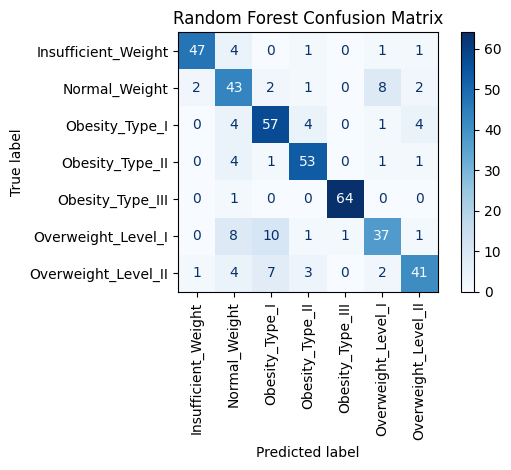

In [123]:
y_pred = rf_pipe.predict(X_test)
plt.figure(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=l.classes_,
    cmap='Blues',

)
plt.title("Random Forest Confusion Matrix")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The confusion matrix shows us that while the Random Forest model performs reasonably (slighlty worse that XGBoost), some misclassifications could have serious health implications on the patients if used in real time.

For example individuals with Obesity Type I and II (4 and 3 persons respectively) were sometimes classified as having a lower weight category, such as Normal Weight or Overweight, which may lead to underestimation of health risks.

In addition, few Normal Weight individuals were classified wrongly at a weight category, posing the risk of potentially lifestyle changes or treatment, with no reason. For example 2 were marked as having Insufficient Weight, and 7 were classified as being Overweight Level I

On the good side, the model accurately identified the more severe obesity cases (such as Obesity Type III) and underweight individuals, which needs medical attention.

These observations highlight the importance of using such models as supportive tools in clinical settings, ensuring human oversight to minimize risks from incorrect predictions.

# Conclusions

The model's predictions for the obesity class are based on observable lifestyle patterns in relation with only one physical attribute, the height. The reason BMI was not included is because it would use it in relation to height, as observed during testing, and would classify a lot easier without taking into account the habits.


The most significant habit is eating food between meals. People who report eating sometimes between meals strongly push the model toward a higher overweight/obesity class, while people who never snack (CAEC_no) or have a consistency in the meals pull the prediction downward. Regardless of other behaviors, a positive family history of overweight boosts an additional upward force to the obesity class, highlighting the importance of genetic factors in a person.

Regarding the gender effects, they are useful only when habits are combined with it; for example, patterns like men who eat sometimes and do not have physical activity show higher BMI on average.


Smoking is also shown to have a mirroring effect on BMI, e.g., smokers tend to have higher BMI than non-smokers with the same rate.


Putting all of these into a model has pretty decent accuracy, but the model overfits. It appears that even after removing features, the overfitting still occurs.


One approach, apart from fine-tuning the hyperparameters, would be either to downsample the dataset, which might create misleading results, or to create synthetic records based on the above data analysis results in order to have a more precise model that will be able to generalize better.


Of course, artificial creation of data must be done with caution in order to be representative, accurate, and cohesive.


For now regarding the misclassification, the wisest solution would be to downsample and remove the outliers on the BMI.

Grammarly was used to correct syntactic mistakes and typo's